<a href="https://colab.research.google.com/github/AmanMinhas/Eth-Price-Prediction-Time-Series/blob/main/eth_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import ETH CSV Data from Google Drive

In [244]:
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
import sys

drive.mount('/content/gdrive')
base_dir_path = "gdrive/My Drive/UpGrad/LJMU_ETH"
sys.path.insert(0, base_dir_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [245]:
# import libraties
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [246]:
# Create ratings dataframe from csv
# eth_history_df = pd.read_csv(f"{base_dir_path}/ETH_day.csv")
# eth_history_df = pd.read_csv(f"{base_dir_path}/ETH-USD.csv")
eth_history_df = pd.read_csv(f"{base_dir_path}/ETH-USD-2017-to-2022.csv")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [247]:
eth_history_df.shape

(1656, 7)

## EDA

In [248]:
# Check null values
eth_history_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [249]:
eth_history_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [250]:
eth_history_df['Date']= pd.to_datetime(eth_history_df['Date'])

In [251]:
eth_history_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [252]:
eth_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1656 non-null   datetime64[ns]
 1   Open       1656 non-null   float64       
 2   High       1656 non-null   float64       
 3   Low        1656 non-null   float64       
 4   Close      1656 non-null   float64       
 5   Adj Close  1656 non-null   float64       
 6   Volume     1656 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 90.7 KB


In [253]:
eth_history_df.head(5)

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [254]:
print(min(eth_history_df.Date))
print(max(eth_history_df.Date))

2017-11-09 00:00:00
2022-05-22 00:00:00


In [255]:
max(eth_history_df.Date) - min(eth_history_df.Date)

Timedelta('1655 days 00:00:00')

In [256]:
eth_history_df["Volume_in_mil"] = eth_history_df.Volume/1000000
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [257]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [258]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [259]:
eth_history_df = eth_history_df.sort_values(by="Date")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [260]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [261]:
# Minimum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.min()]

Date       Open       High        Low      Close  Adj Close  \
400 2018-12-14  86.630356  87.144943  83.226479  84.308296  84.308296   

         Volume  Volume_in_mil  
400  1651491877    1651.491877

In [262]:
# Maximum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.max()]

Date         Open         High          Low        Close  \
1460 2021-11-08  4619.649414  4822.363281  4619.649414  4812.087402   

        Adj Close       Volume  Volume_in_mil  
1460  4812.087402  19290896267   19290.896267

In [263]:
# Minimum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.min()]

Date        Open        High        Low       Close   Adj Close  \
8 2017-11-17  330.166992  334.963989  327.52301  332.394012  332.394012   

      Volume  Volume_in_mil  
8  621732992     621.732992

In [264]:
# Maximum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.max()]

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   

        Adj Close       Volume  Volume_in_mil  
1287  2460.679199  84482912776   84482.912776

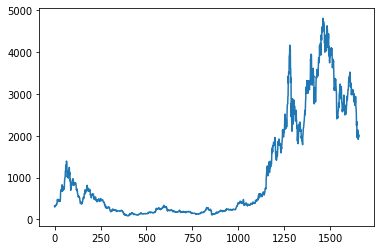

In [265]:
plt.plot(eth_history_df.Close)

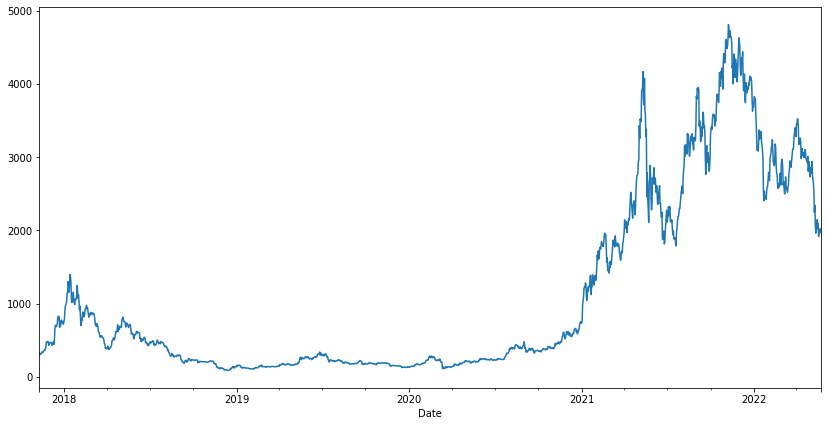

In [266]:
eth_history_date_index_df = eth_history_df.copy()
eth_history_date_index_df = eth_history_date_index_df.set_index('Date')
eth_history_date_index_df.Close.plot(figsize=(14,7))

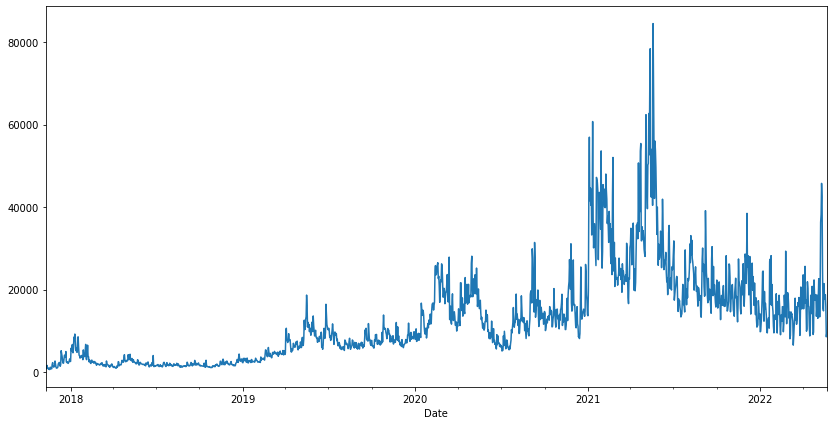

In [267]:
eth_history_date_index_df.Volume_in_mil.plot(figsize=(14,7))

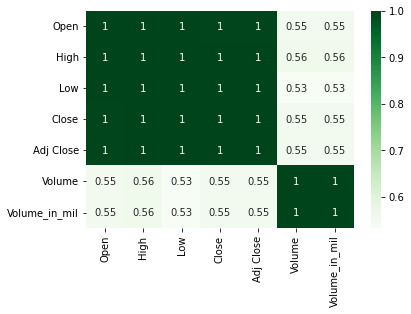

In [268]:
sns.heatmap(eth_history_date_index_df.corr(), annot=True, cmap="Greens")
plt.show()

In [269]:
eth_history_df.Close

0        320.884003
1        299.252991
2        314.681000
3        307.907990
4        316.716003
           ...     
1651    1916.656128
1652    2018.336182
1653    1961.315674
1654    1974.518311
1655    2017.376343
Name: Close, Length: 1656, dtype: float64

In [270]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [271]:
# Calculate deltaClose and deltaPctClose
eth_history_df['deltaClose'] = eth_history_df['Close'].diff()
eth_history_df['deltaPctClose'] = eth_history_df['Close'].pct_change()
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
0      320.884003    893249984     893.249984         NaN            NaN  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1651 rows x 10 columns]

In [272]:
eth_history_df.shape

(1656, 10)

In [273]:
# Drop first row where deltaClose is NaN
eth_history_df = eth_history_df.iloc[1:, :]
eth_history_df.shape

(1655, 10)

In [274]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
5    2017-11-14   316.763000   340.177002   316.763000   337.631012   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
5      337.631012   1069680000    1069.680000   20.915009       0.066037  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1650 rows x 10 columns]

In [275]:
def print_col_min_max(df, col):
  display(df[(df[col] == df[col].max()) | (df[col] == df[col].min())])

print_col_min_max(eth_history_df, 'deltaClose')
print_col_min_max(eth_history_df, 'deltaPctClose')

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   
1292 2021-05-24  2099.936035  2672.595703  2090.639648  2643.591064   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1287  2460.679199  84482912776   84482.912776 -919.390869      -0.272003  
1292  2643.591064  53697121740   53697.121740  534.011230       0.253136

Date        Open        High         Low       Close   Adj Close  \
33  2017-12-12  522.286011  657.317993  504.493988  651.431030  651.431030   
854 2020-03-12  194.738922  195.147934  111.210709  112.347122  112.347122   

          Volume  Volume_in_mil  deltaClose  deltaPctClose  
33    5179829760    5179.829760  136.295044       0.264581  
854  22134741655   22134.741655  -82.521408      -0.423472

In [276]:
eth_history_df.loc['2020-03-10':'2020-03-15']

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [277]:
eth_history_df.loc['2017-12-10':'2017-12-15']
# eth_history_df.loc[(eth_history_df.index.month==12)].head(15)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [278]:
eth_history_df.head(20)

Date        Open        High         Low       Close   Adj Close  \
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
5  2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
6  2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   
7  2017-11-16  333.442993  336.158997  323.605988  330.924011  330.924011   
8  2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
9  2017-11-18  331.980011  349.615997  327.687012  347.612000  347.612000   
10 2017-11-19  347.401001  371.290985  344.739990  354.385986  354.385986   
11 2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   
12 2017-11-21  367.442993  372.470001  350.692993  360.401001  360.401001   
13 2017-11-22  360.312012  381.420013  360.147003  380.652008  380.652008   
14 2017-11-23  381.438995  425.548004  376.088013  410.165985  410.165985   
15 2017-11-24  412.501007  480.972992  402.757996  474.911011  474.911011   
16 2017-11-25  475.675995  485.191986  461.053009  466.276001  466.276001   
17 2017-11-26  465.973999  472.722992  451.605988  471.329987  471.329987   
18 2017-11-27  471.531006  493.404999  468.484985  480.355011  480.355011   
19 2017-11-28  480.518005  482.480011  466.346985  472.902008  472.902008   
20 2017-11-29  473.281006  522.307007  425.071014  427.523010  427.523010   

        Volume  Volume_in_mil  deltaClose  deltaPctClose  
1    885985984     885.985984  -21.631012      -0.067411  
2    842300992     842.300992   15.428009       0.051555  
3   1613479936    1613.479936   -6.773010      -0.021523  
4   1041889984    1041.889984    8.808013       0.028606  
5   1069680000    1069.680000   20.915009       0.066037  
6    722665984     722.665984   -4.274017      -0.012659  
7    797254016     797.254016   -2.432984      -0.007298  
8    621732992     621.732992    1.470001       0.004442  
9    649638976     649.638976   15.217988       0.045783  
10  1181529984    1181.529984    6.773986       0.019487  
11   807027008     807.027008   12.344025       0.034832  
12   949912000     949.912000   -6.329010      -0.017258  
13   800819008     800.819008   20.251007       0.056190  
14  1845680000    1845.680000   29.513977       0.077535  
15  2292829952    2292.829952   64.745026       0.157851  
16  1422080000    1422.080000   -8.635010      -0.018182  
17  1197779968    1197.779968    5.053986       0.010839  
18  1396480000    1396.480000    9.025024       0.019148  
19  1346499968    1346.499968   -7.453003      -0.015516  
20  2675940096    2675.940096  -45.378998      -0.095959

In [279]:
eth_history_df = eth_history_df.set_index('Date')

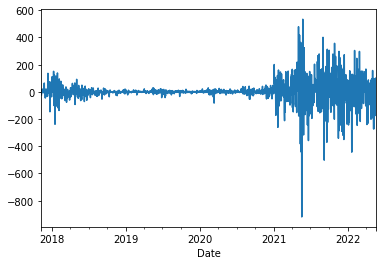

In [280]:
# Plot deltaClose
eth_history_df.deltaClose.plot()

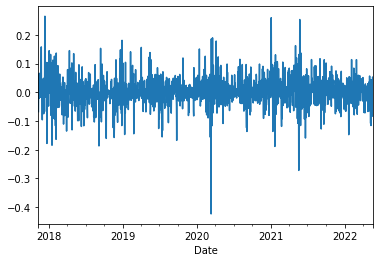

In [281]:
# Plot deltaPctClose
# plt.plot(eth_history_df.deltaPctClose)
eth_history_df.deltaPctClose.plot()

In [282]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1655.000000  1655.000000  1655.000000  1655.000000  1655.000000   
mean   1090.036278  1126.224181  1048.963612  1090.811581  1090.811581   
std    1257.679934  1296.423071  1212.807284  1257.231479  1257.231479   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.936753   204.721497   194.634827   199.030334   199.030334   
50%     402.142944   417.159210   390.609985   403.997040   403.997040   
75%    1896.623963  1971.903321  1811.487244  1905.000427  1905.000427   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil   deltaClose  deltaPctClose  
count  1.655000e+03    1655.000000  1655.000000    1655.000000  
mean   1.266486e+10   12664.856986     1.025071       0.002436  
std    1.116051e+10   11160.508713    80.388975       0.051012  
min    6.217330e+08     621.732992  -919.390869      -0.423472  
25%    3.426054e+09    3426.054254    -9.499260      -0.021530  
50%    9.926712e+09    9926.711979     0.371323       0.001544  
75%    1.803431e+10   18034.306122    13.964226       0.028021  
max    8.448291e+10   84482.912776   534.011230       0.264581

In [283]:
df_close = eth_history_df.reset_index()['Close']
df_deltaClose = eth_history_df.reset_index()['deltaClose']
df_deltaPctClose = eth_history_df.reset_index()['deltaPctClose']

In [284]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [285]:
print(df_close)
print(df_deltaClose)
print(df_deltaPctClose)

0        299.252991
1        314.681000
2        307.907990
3        316.716003
4        337.631012
           ...     
1650    1916.656128
1651    2018.336182
1652    1961.315674
1653    1974.518311
1654    2017.376343
Name: Close, Length: 1655, dtype: float64
0       -21.631012
1        15.428009
2        -6.773010
3         8.808013
4        20.915009
           ...    
1650   -173.753052
1651    101.680054
1652    -57.020508
1653     13.202637
1654     42.858032
Name: deltaClose, Length: 1655, dtype: float64
0      -0.067411
1       0.051555
2      -0.021523
3       0.028606
4       0.066037
          ...   
1650   -0.083119
1651    0.053051
1652   -0.028251
1653    0.006732
1654    0.021706
Name: deltaPctClose, Length: 1655, dtype: float64


### Time Resampling

In [286]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [287]:
# Rules 
rule_desc = {
    "MS": "Montly Start Frequency",
    "QS": "Quarterly Start Frequency",
    "A": "Year End Frequency",
}

In [288]:
# Check Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-12-31  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2019-12-31   336.959900   361.398682   315.954865   336.753174   336.753174   
2020-12-31   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-12-31  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-12-31  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31   5179829760    5179.829760  136.295044       0.264581  
2018-12-31   9214950400    9214.950400  151.209961       0.180750  
2019-12-31  18661465873   18661.465873   30.004486       0.156042  
2020-12-31  31421134556   31421.134556   50.385926       0.189404  
2021-12-31  84482912776   84482.912776  534.011230       0.259475  
2022-12-31  45743399154   45743.399154  304.424316       0.113627

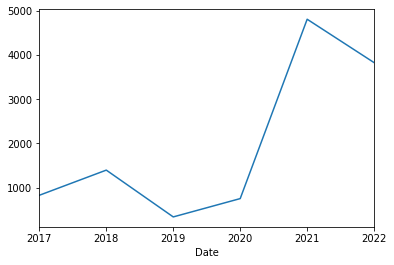

In [289]:
# Plot Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()['Close'].plot()

In [290]:
# Check Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-01-01  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2018-04-01   816.088013   835.057007   784.237000   816.119995   816.119995   
2018-07-01   500.838013   513.432983   488.416992   501.002014   501.002014   
2018-10-01   233.220001   234.145004   226.945007   230.768005   230.768005   
2019-01-01   158.902405   165.549622   154.337418   158.795425   158.795425   
2019-04-01   336.959900   361.398682   315.954865   336.753174   336.753174   
2019-07-01   313.325165   318.223114   305.285828   313.251404   313.251404   
2019-10-01   193.191071   195.942505   188.667679   193.293259   193.293259   
2020-01-01   284.561310   287.123688   264.279663   284.217499   284.217499   
2020-04-01   247.548538   252.222000   242.819748   247.444946   247.444946   
2020-07-01   477.007874   487.211884   432.079193   477.051910   477.051910   
2020-10-01   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-01-01  1959.902954  2036.286499  1896.684448  1960.164795  1960.164795   
2021-04-01  4174.635742  4362.350586  3785.848633  4168.701172  4168.701172   
2021-07-01  3951.520752  4022.469238  3868.994385  3952.133545  3952.133545   
2021-10-01  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-01-01  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   
2022-04-01  3522.364990  3573.960205  3442.000244  3522.833496  3522.833496   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01   5179829760    5179.829760  136.295044       0.264581  
2018-01-01   9214950400    9214.950400  151.209961       0.144702  
2018-04-01   4316120064    4316.120064   92.394043       0.144937  
2018-07-01   2836200000    2836.200000   30.807984       0.152855  
2018-10-01   4370343387    4370.343387   21.071106       0.180750  
2019-01-01   5957715043    5957.715043   14.732445       0.140933  
2019-04-01  18661465873   18661.465873   30.004486       0.156042  
2019-07-01  11757739233   11757.739233   18.153443       0.071311  
2019-10-01  13831784986   13831.784986   19.354660       0.119349  
2020-01-01  27864623061   27864.623061   29.554932       0.189404  
2020-04-01  28089191904   28089.191904   25.589234       0.178264  
2020-07-01  31421134556   31421.134556   41.972168       0.114729  
2020-10-01  31104004592   31104.004592   50.385926       0.098177  
2021-01-01  60733630300   60733.630300  200.972717       0.259475  
2021-04-01  84482912776   84482.912776  534.011230       0.253136  
2021-07-01  39131346397   39131.346397  401.095459       0.116810  
2021-10-01  38478999182   38478.999182  357.061524       0.101889  
2022-01-01  29312342666   29312.342666  304.424316       0.113627  
2022-04-01  45743399154   45743.399154  167.909424       0.056465

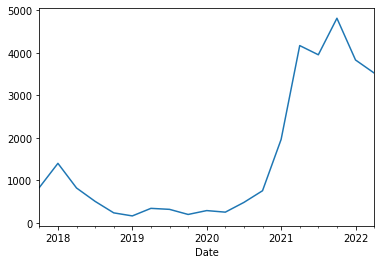

In [291]:
# Plot Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()['Close'].plot()

In [292]:
# Check Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-12-31    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-12-31   104.645050   106.058876   102.934563   104.535301   104.535301   
2020-12-31   110.406784   116.021622    95.184303   110.605873   110.605873   
2021-12-31   730.402649   749.201843   718.109497   730.367554   730.367554   
2022-12-31  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31    621732992     621.732992 -146.203003      -0.178066  
2018-12-31    948488000     948.488000 -238.230103      -0.186866  
2019-12-31   2212109224    2212.109224  -42.485535      -0.167444  
2020-12-31   5109032700    5109.032700  -82.521408      -0.423472  
2021-12-31  10894785525   10894.785525 -919.390869      -0.272003  
2022-12-31   6532996574    6532.996574 -443.188476      -0.147674

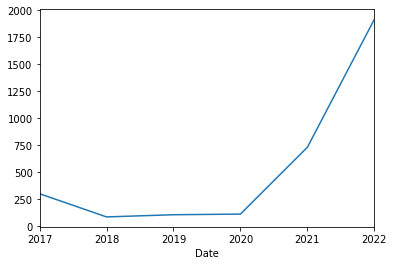

In [293]:
# Plot Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()['Close'].plot()

In [294]:
# Check Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-01-01   385.904999   409.928986   368.632996   385.967987   385.967987   
2018-04-01   370.380005   385.195007   363.804993   370.285004   370.285004   
2018-07-01   183.679001   185.587006   170.257004   183.330994   183.330994   
2018-10-01    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-01-01   104.645050   106.058876   102.934563   104.535301   104.535301   
2019-04-01   141.465485   142.733994   140.737564   141.830322   141.830322   
2019-07-01   166.651703   170.773514   157.130325   166.727127   166.727127   
2019-10-01   122.656837   128.097565   119.780060   122.603889   122.603889   
2020-01-01   110.406784   116.021622    95.184303   110.605873   110.605873   
2020-04-01   133.612320   135.634552   129.730942   135.634552   135.634552   
2020-07-01   225.288483   229.629318   224.544495   225.387070   225.387070   
2020-10-01   340.943085   342.450836   334.545563   340.815857   340.815857   
2021-01-01   730.402649   749.201843   718.109497   730.367554   730.367554   
2021-04-01  1810.884277  1850.179810  1707.600586  1813.217285  1813.217285   
2021-07-01  1786.276245  1836.998047  1722.050781  1787.510742  1787.510742   
2021-10-01  3001.129395  3329.853516  2978.654297  3307.516113  3307.516113   
2022-01-01  2406.924316  2498.507080  2172.301270  2405.181152  2405.181152   
2022-04-01  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01    621732992     621.732992 -146.203003      -0.178066  
2018-01-01   1151170048    1151.170048 -238.230103      -0.184400  
2018-04-01    948488000     948.488000  -92.742004      -0.130962  
2018-07-01   1164120000    1164.120000  -53.391998      -0.186866  
2018-10-01   1084810000    1084.810000  -36.270004      -0.160651  
2019-01-01   2212109224    2212.109224  -22.942764      -0.147065  
2019-04-01   4611999536    4611.999536  -42.485535      -0.126162  
2019-07-01   5238542572    5238.542572  -41.880737      -0.167444  
2019-10-01   5837211771    5837.211771  -14.235626      -0.082403  
2020-01-01   7430904515    7430.904515  -82.521408      -0.423472  
2020-04-01   5600408178    5600.408178  -23.000564      -0.108698  
2020-07-01   5109032700    5109.032700  -54.368561      -0.136464  
2020-10-01   8125837102    8125.837102  -51.885499      -0.090918  
2021-01-01  13652004358   13652.004358 -260.703125      -0.188605  
2021-04-01  18765854896   18765.854896 -919.390869      -0.272003  
2021-07-01  13296586731   13296.586731 -501.985108      -0.127784  
2021-10-01  10894785525   10894.785525 -350.226318      -0.084709  
2022-01-01   6532996574    6532.996574 -443.188476      -0.147674  
2022-04-01   8546822406    8546.822406 -272.029541      -0.115810

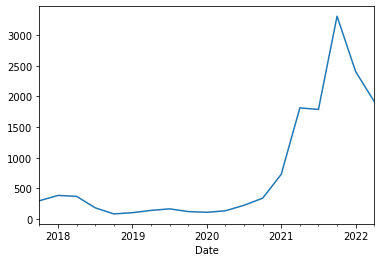

In [295]:
# Plot Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()['Close'].plot()

In [296]:
# Check mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-12-31   485.397384   502.704094   463.143234   483.507727   483.507727   
2019-12-31   181.771947   186.367671   176.947580   181.770137   181.770137   
2020-12-31   305.899433   315.010121   297.221470   307.542978   307.542978   
2021-12-31  2771.215477  2872.125942  2658.899019  2778.354149  2778.354149   
2022-12-31  2884.363482  2956.100795  2795.452046  2872.725646  2872.725646   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-12-31  2.037049e+09    2037.048527    8.381711       0.018814  
2018-12-31  2.276869e+09    2276.869352   -1.707849      -0.003163  
2019-12-31  6.967028e+09    6967.027840   -0.010294       0.000771  
2020-12-31  1.424528e+10   14245.276813    1.661728       0.006070  
2021-12-31  2.728082e+10   27280.819105    8.068026       0.005983  
2022-12-31  1.626140e+10   16261.401599  -11.727158      -0.003378

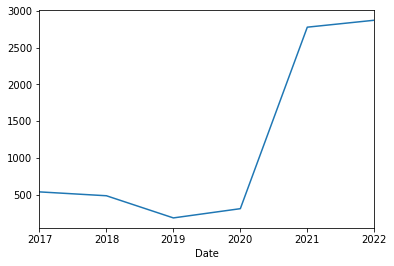

In [297]:
# Plot mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()['Close'].plot()

In [298]:
# Check mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-01-01   871.791709   911.641502   818.832786   867.320934   867.320934   
2018-04-01   574.128099   591.948726   553.943782   574.633165   574.633165   
2018-07-01   341.340281   349.463186   329.785836   338.810457   338.810457   
2018-10-01   163.693786   167.622957   158.729876   162.600609   162.600609   
2019-01-01   130.946503   133.907482   128.210433   131.030422   131.030422   
2019-04-01   218.524983   226.252934   212.650139   220.182696   220.182696   
2019-07-01   212.830744   217.485638   205.900593   211.642078   211.642078   
2019-10-01   164.080147   167.117726   160.357724   163.539845   163.539845   
2020-01-01   184.166511   190.282980   177.310988   184.195056   184.195056   
2020-04-01   204.400526   209.576307   200.072916   205.440528   205.440528   
2020-07-01   341.606476   351.650596   331.544364   343.038269   343.038269   
2020-10-01   490.997786   506.028851   477.598274   495.047509   495.047509   
2021-01-01  1528.509033  1594.946289  1458.077849  1541.277395  1541.277395   
2021-04-01  2593.181946  2719.470675  2442.737247  2597.435252  2597.435252   
2021-07-01  2841.780110  2937.660499  2740.083865  2850.271792  2850.271792   
2021-10-01  4092.440313  4207.002234  3966.242721  4095.572674  4095.572674   
2022-01-01  2939.659597  3018.542529  2849.177338  2935.221465  2935.221465   
2022-04-01  2788.658666  2848.028562  2702.465964  2764.559805  2764.559805   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-10-01  2.037049e+09    2037.048527    8.381711       0.018814  
2018-01-01  3.341332e+09    3341.331567   -4.003066      -0.004936  
2018-04-01  2.170332e+09    2170.331749    0.645308       0.002875  
2018-07-01  1.702962e+09    1702.961632   -2.416652      -0.006083  
2018-10-01  1.914835e+09    1914.834926   -1.081302      -0.004483  
2019-01-01  3.615201e+09    3615.201047    0.090509       0.001510  
2019-04-01  8.675775e+09    8675.775150    1.639361       0.009012  
2019-07-01  7.352821e+09    7352.821448   -1.204606      -0.004241  
2019-10-01  8.170021e+09    8170.021255   -0.546319      -0.003090  
2020-01-01  1.543945e+10   15439.454149    0.043766       0.003119  
2020-04-01  1.417553e+10   14175.526180    1.018917       0.006600  
2020-07-01  1.243379e+10   12433.794811    1.452422       0.005978  
2020-10-01  1.494455e+10   14944.554142    4.107234       0.008558  
2021-01-01  3.244661e+10   32446.605572   13.117318       0.012545  
2021-04-01  3.647458e+10   36474.583603    3.914127       0.004509  
2021-07-01  2.118185e+10   21181.848898    7.903602       0.004106  
2021-10-01  1.923247e+10   19232.470275    7.401672       0.002898  
2022-01-01  1.493472e+10   14934.716189   -4.455444      -0.000440  
2022-04-01  1.855759e+10   18557.587885  -24.312817      -0.008462

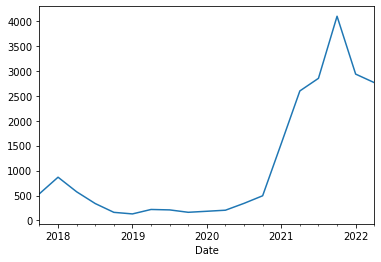

In [299]:
# Plot mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()['Close'].plot()

In [300]:
def plot_resample_with_rule(rule):
  fig, axs = plt.subplots(1, 3, figsize=(20, 4))
  plt.tight_layout()
  fig.autofmt_xdate()

  # plt.title(f"Min Max and Mean for Rule: {rule}")
  axs[0].set_title(f"Min Close Price for Rule: {rule_desc[rule]}")
  axs[0].plot(eth_history_df.resample(rule=rule).min()['Close'])

  axs[1].set_title(f"Max Close Price for Rule: {rule_desc[rule]}")
  axs[1].plot(eth_history_df.resample(rule=rule).max()['Close'])

  axs[2].set_title(f"Avg Close Price for Rule: {rule_desc[rule]}")
  axs[2].plot(eth_history_df.resample(rule=rule).mean()['Close'])

  plt.show()

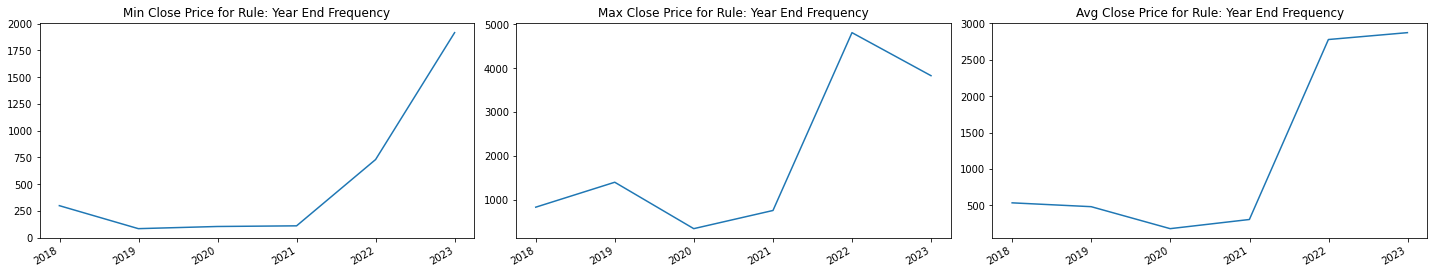

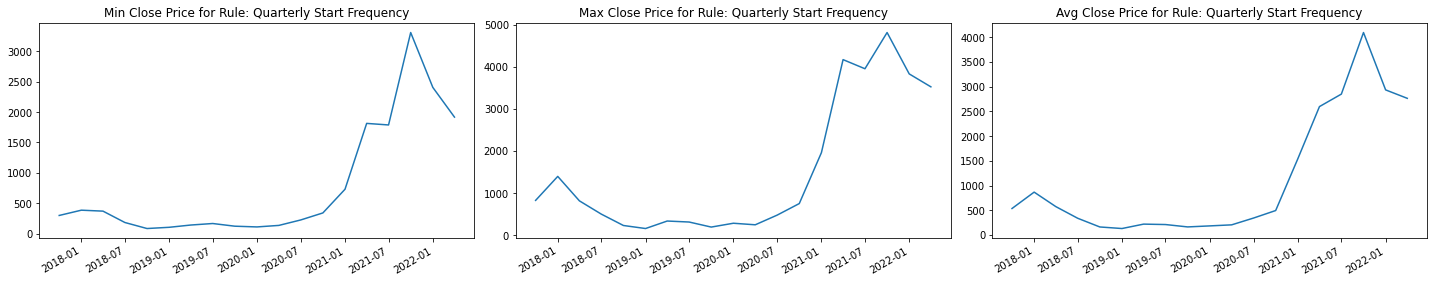

In [301]:
plot_resample_with_rule('A')
plot_resample_with_rule('QS')

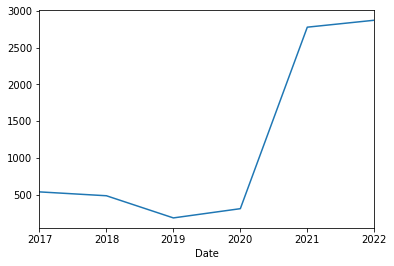

In [302]:
eth_history_df.resample(rule='A').mean()['Close'].plot()

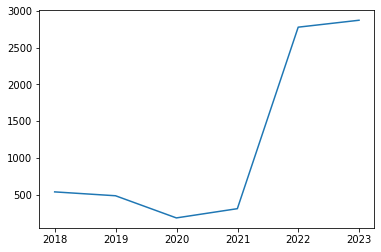

In [303]:
plt.plot(eth_history_df.resample(rule='A').mean()['Close'])

In [304]:
eth_history_df.resample(rule='A').mean()['Close']

Date
2017-12-31     536.148270
2018-12-31     483.507727
2019-12-31     181.770137
2020-12-31     307.542978
2021-12-31    2778.354149
2022-12-31    2872.725646
Freq: A-DEC, Name: Close, dtype: float64

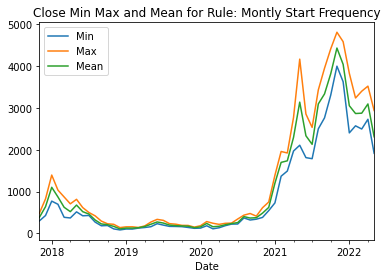

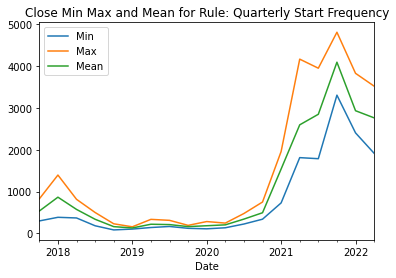

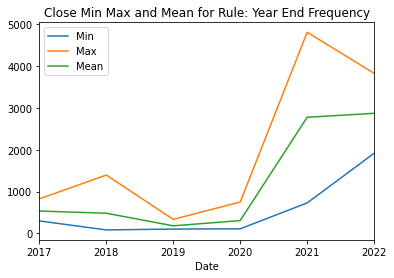

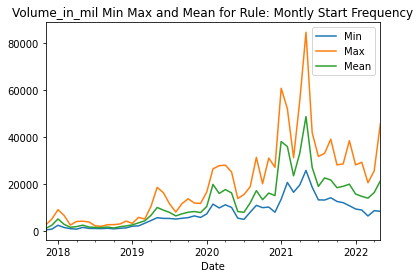

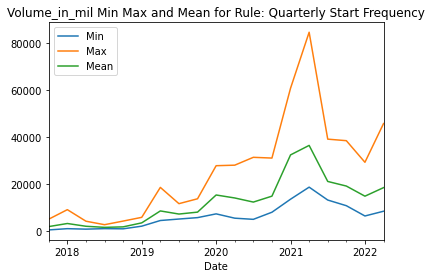

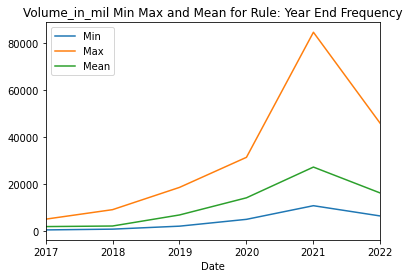

In [305]:
def plot_resample_with_rule_2(rule, column):
  eth_history_df.resample(rule=rule).min()[column].plot(legend=True, label="Min")
  eth_history_df.resample(rule=rule).max()[column].plot(legend=True, label="Max")
  eth_history_df.resample(rule=rule).mean()[column].plot(legend=True, label="Mean")
  plt.title(f"{column} Min Max and Mean for Rule: {rule_desc[rule]}")
  plt.show()

plot_resample_with_rule_2('MS', 'Close')
plot_resample_with_rule_2('QS', 'Close')
plot_resample_with_rule_2('A', 'Close')
plot_resample_with_rule_2('MS', 'Volume_in_mil')
plot_resample_with_rule_2('QS', 'Volume_in_mil')
plot_resample_with_rule_2('A', 'Volume_in_mil')

In [306]:
# eth_history_df.resample(rule="MS").min()['Close']

### Seasonality & Trend Check

In [307]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [308]:
eth_history_df_copy = eth_history_df.copy()
eth_history_df_copy.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [309]:
# eth_history_df_copy.set_index('Date', inplace=True)
# eth_history_df_copy.head()

In [310]:
eth_history_df_copy = eth_history_df_copy[['Close']]
eth_history_df_copy.head()

Close
Date                  
2017-11-10  299.252991
2017-11-11  314.681000
2017-11-12  307.907990
2017-11-13  316.716003
2017-11-14  337.631012

In [311]:
def checkSeasonality(df):
  result = seasonal_decompose(df, model="multiplicative")

  trend = result.trend
  seasonal = result.seasonal
  residual = result.resid

  result.plot()

  return trend, seasonal, residual

(                  Close
 Date                   
 2017-11-10          NaN
 2017-11-11          NaN
 2017-11-12          NaN
 2017-11-13   320.067143
 2017-11-14   324.801575
 ...                 ...
 2022-05-18  2018.524031
 2022-05-19  2000.191110
 2022-05-20          NaN
 2022-05-21          NaN
 2022-05-22          NaN
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10  0.996570
 2017-11-11  1.001954
 2017-11-12  1.002124
 2017-11-13  1.001597
 2017-11-14  1.001585
 ...              ...
 2022-05-18  1.001356
 2022-05-19  0.994813
 2022-05-20  0.996570
 2022-05-21  1.001954
 2022-05-22  1.002124
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10       NaN
 2017-11-11       NaN
 2017-11-12       NaN
 2017-11-13  0.987952
 2017-11-14  1.037854
 ...              ...
 2022-05-18  0.948248
 2022-05-19  1.014333
 2022-05-20       NaN
 2022-05-21       NaN
 2022-05-22       NaN
 
 [1655 rows x 1 columns])

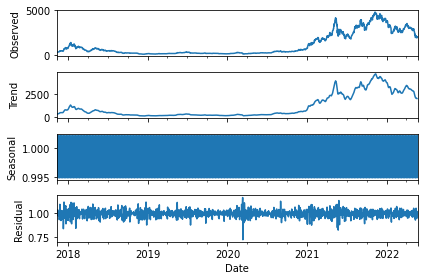

In [312]:
checkSeasonality(eth_history_df_copy)

### Plot Histogram

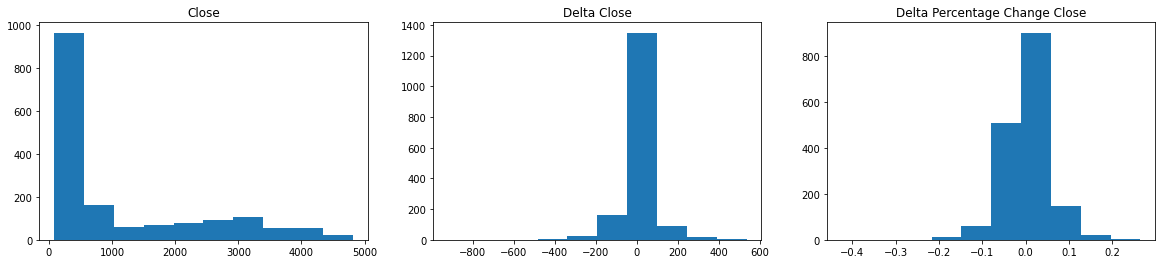

In [313]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

axs[0].set_title('Close')
axs[0].hist(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].hist(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].hist(eth_history_df['deltaPctClose'])

plt.show()

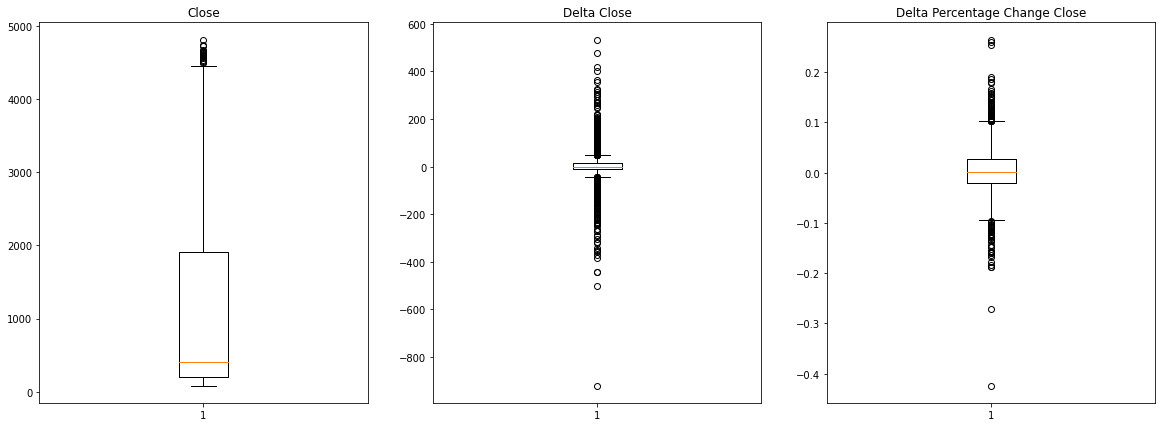

In [314]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

axs[0].set_title('Close')
axs[0].boxplot(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].boxplot(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].boxplot(eth_history_df['deltaPctClose'])

plt.show()

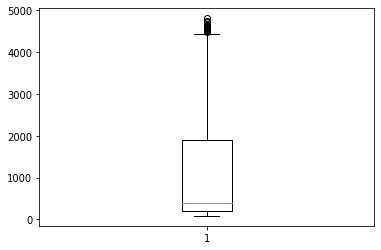

In [315]:
# eth_history_df['Close'].boxplot()
plt.boxplot(eth_history_df['Close'])
plt.show()

In [316]:
print("Close")
print(eth_history_df['Close'].describe())
print("")
print("DeltaClose")
print(eth_history_df['deltaClose'].describe())
print("")
print("DeltaPctClose")
print(eth_history_df['deltaPctClose'].describe())

Close
count    1655.000000
mean     1090.811581
std      1257.231479
min        84.308296
25%       199.030334
50%       403.997040
75%      1905.000427
max      4812.087402
Name: Close, dtype: float64

DeltaClose
count    1655.000000
mean        1.025071
std        80.388975
min      -919.390869
25%        -9.499260
50%         0.371323
75%        13.964226
max       534.011230
Name: deltaClose, dtype: float64

DeltaPctClose
count    1655.000000
mean        0.002436
std         0.051012
min        -0.423472
25%        -0.021530
50%         0.001544
75%         0.028021
max         0.264581
Name: deltaPctClose, dtype: float64


In [317]:
# eth_history_df.loc(2019)['Close']

print(eth_history_df['2019']['Close'].describe())

print(eth_history_df['2021']['Close'].describe())

count    365.000000
mean     181.770137
std       50.382666
min      104.535301
25%      142.398178
50%      173.889969
75%      210.522598
max      336.753174
Name: Close, dtype: float64
count     365.000000
mean     2778.354149
std      1023.543690
min       730.367554
25%      1895.552124
50%      2633.518311
75%      3638.122070
max      4812.087402
Name: Close, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


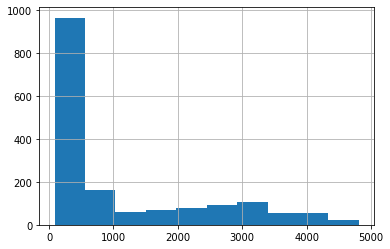

In [318]:
eth_history_df['Close'].hist()

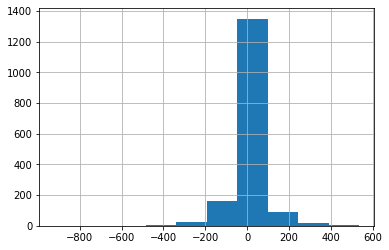

In [319]:
eth_history_df['deltaClose'].hist()

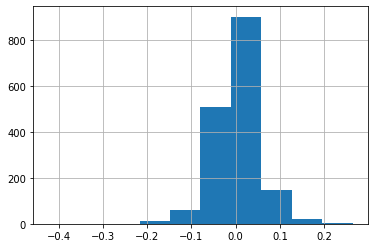

In [320]:
eth_history_df['deltaPctClose'].hist()

### Check Mean and Variance
We will check mean and variance after splitting the data in half

In [321]:
def checkMeanAndVariance(df, col_name):
  # X = series.values
  X = df[[col_name]].copy()
  split = int(len(X)/2)
  X1, X2 = X[0:split], X[split:]

  # mean1, mean2 = round(float(X1.mean()), 2), round(float(X2.mean()), 2)
  # var1, var2 = round(float(X1.var()), 2), round(float(X2.var()), 2)
  mean1, mean2 = float(X1.mean()), float(X2.mean())
  var1, var2 = float(X1.var()), float(X2.var())

  print(f"Analysis for {col_name}")
  print(f"mean1={float(mean1)}, mean2={float(mean2)}")
  print(f"variance1={float(var1)}, variance2={float(var2)}")

  # X1.hist()
  # X2.hist()
  # plt.show()

  fig, axs = plt.subplots(1, 2, figsize=(20, 4))

  # axs[0].set_title(col_name)
  axs[0].hist(X1[col_name])
  axs[1].hist(X2[col_name])

  plt.show()


Analysis for Close
mean1=336.99130479685624, mean2=1843.7214459396118
variance1=66678.96376660561, variance2=1958859.9142969397


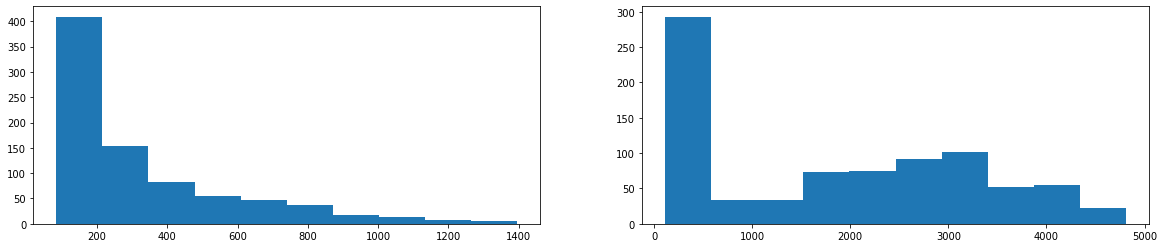

---
Analysis for deltaClose
mean1=-0.044336764207980967, mean2=2.0931870096618352
variance1=711.6047444288109, variance2=12211.744361361849


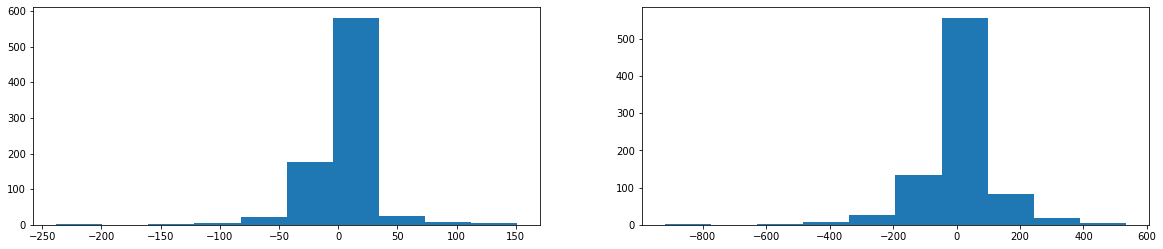

---
Analysis for deltaPctClose
mean1=0.0011225718930756613, mean2=0.003747398607861875
variance1=0.002536055377473825, variance2=0.002668042041104589


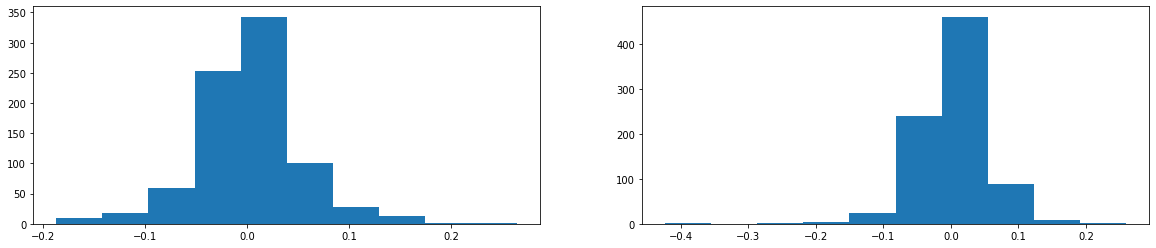

In [322]:
checkMeanAndVariance(eth_history_df, 'Close')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaClose')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaPctClose')

In [323]:
df_deltaPctClose.min(), df_deltaPctClose.max()

(-0.42347221483119923, 0.2645807082093463)

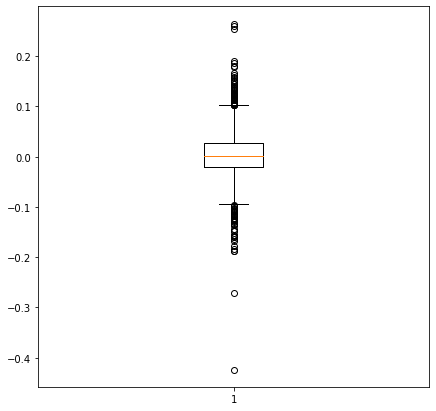

In [324]:
plt.figure(figsize =(7, 7))
plt.boxplot(df_deltaPctClose)
plt.show()

### Augmented Dickey-Fuller test
Read more : https://machinelearningmastery.com/time-series-data-stationary-python/

In [325]:
from statsmodels.tsa.stattools import adfuller

In [326]:
def checkAdfuller(df, col_name):
  s = df[col_name].values
  result = adfuller(s)
  adf_val, p_val = result[0], result[1]
  print(col_name)
  # print('ADF Statistic: %f' % result[0])
  # print('p-value: %f' % result[1])
  print('ADF Statistic: %f' % adf_val)
  print('p-value: %f' % p_val)
  print(f"{col_name} series is", "Stationary" if p_val < 0.05 else "NOT Stationary")

In [327]:
checkAdfuller(eth_history_df, 'Close')
print('---')
checkAdfuller(eth_history_df, 'deltaClose')
print('---')
checkAdfuller(eth_history_df, 'deltaPctClose')

Close
ADF Statistic: -1.115920
p-value: 0.708682
Close series is NOT Stationary
---
deltaClose
ADF Statistic: -10.255242
p-value: 0.000000
deltaClose series is Stationary
---
deltaPctClose
ADF Statistic: -14.812627
p-value: 0.000000
deltaPctClose series is Stationary


In [328]:
# create dataset 
# In this step we use a window length and format the train and test data so that they are in time series format.
# Ex, X = [1, 2, 3], y = [4]
# Ex, X = [2, 3, 4], y = [5]
# Ex, X = [4, 5, 6], y = [6]
# And so on....

def create_Xy_dataset(df, interval, print_samples = False):
  dataX, dataY = [], []

  # print(f"interval = {interval}")
  rangeSize = len(df) - interval

  for i in range(rangeSize):
    x = df[i:i+interval, 0]
    y = df[i+interval, 0]

    if (print_samples):
      # Print some samples
      if (i<5 or i>len(df) - interval - 1 - 5):
        print(f"x = {x}")
        print(f"y = {y}")
        print("")

    dataX.append(x)
    dataY.append(y)
  
  X = np.array(dataX)
  X = X.reshape(X.shape[0], X.shape[1], 1) # reshape for LSTM. Add 3rd dimension
  y = np.array(dataY)

  return X, y

In [329]:
# X, y = create_Xy_dataset(df_close, 3)
print(len(df_close))
# print(X)
# print(y)

1655


## Create Models

In [362]:
# Create LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D

In [331]:
def getNextNPredictions(interval, X_train, model, num_next_n_predictions):
  # Initialize Prediction Set
  predictions = []
  predictions_flat = []


  # last_batch_start_idx = interval * -1
  # last_train_batch = X_train[last_batch_start_idx:]
  # last_train_batch = last_train_batch.reshape((1, interval, 1))
  # eval_batch = last_train_batch

  eval_batch = X_train[-1:]

  for i in range(num_next_n_predictions):
    # Predict the evaluation batch
    pred = model.predict(eval_batch)[0]

    # Add prediction to predictions array
    predictions.append(pred)
    predictions_flat.append(pred[0])

    # shift eval batch by one by removing the 1st element and adding pred as last element 
    eval_batch = np.append(eval_batch[:, 1:, :], [[pred]], axis=1)
  
  return predictions, predictions_flat


In [389]:
# split into train and test data. By default use 70% data for training and rest for testing.
def df_train_test_split(df, train_size_pct = 0.70):
  training_size = int(len(df) * train_size_pct) # use 70% data to train
  test_size = len(df) - training_size # use the remaining 30% for test

  # print("-------------------------------")
  # print(f"Total Size = {len(df)}")
  # print(f"Train Size = {training_size}")
  # print(f"Test Size = {test_size}")

  train_data = df[0:training_size,:]
  test_data = df[training_size:len(df), :1]

  # print(f"Train data Size = {len(train_data)}")
  # print(f"Test data Size = {len(test_data)}")

  return train_data, test_data

def getScaledDf(df, scaler):
  print('Plot Before Scaling')
  print(plt.plot(df))
  plt.show()
  scaled_df = scaler.fit_transform(np.array(df).reshape(-1, 1))
  print('Plot After Scaling')
  print(plt.plot(scaled_df))
  plt.show()
  return scaled_df

def getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test):
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

  # Inverse scale
  if (scaler):
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

  return train_predict, test_predict

def getPredSeries(df, interval, train_predict, test_predict):
  print(f"train_predict length = {len(train_predict)} ")
  print(f"test_predict length = {len(test_predict)} ")

  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(df)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[interval:len(train_predict)+interval, :] = train_predict

  print(f"test_predict range start = {len(train_predict)+(interval*2)+1}")
  print(f"test_predict range end = {len(df)-1}")
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(df)
  testPredictPlot[:, :] = np.nan
  # testPredictPlot[len(train_predict)+(interval*2)+1:len(df)-1, :] = test_predict
  testPredictPlot[len(train_predict)+(interval*2):, :] = test_predict

  return trainPredictPlot, testPredictPlot

def plotSequence(df, interval, scaler, train_predict, test_predict):
  # get train and test predictions for plotting
  # shift train predictions for plotting
  trainPredictPlot, testPredictPlot = getPredSeries(df, interval, train_predict, test_predict)

  # plot baseline and predictions
  if (scaler):
    plt.plot(scaler.inverse_transform(df))
  else:
    plt.plot(df)

  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()

def plotResiduals(pred_train_df, pred_test_df):
  fig, axs = plt.subplots(1, 2, figsize=(16, 4))
  train_residual_df = pred_train_df.copy()
  train_residual_df['residual'] = train_residual_df['y_train_actual'] - train_residual_df['train_predict']
  test_residual_df = pred_test_df.copy()
  test_residual_df['residual'] = test_residual_df['y_test_actual'] - test_residual_df['test_predict']

  sns.residplot(x="y_train_actual", y="residual", data=train_residual_df, ax=axs[0])
  axs[0].set(xlabel="Train Actual", ylabel="Residual")
  axs[0].set_title("Train Residuals")

  sns.residplot(x="y_test_actual", y="residual", data=test_residual_df, ax=axs[1])
  axs[1].set(xlabel="Test Actual", ylabel="Residual")
  axs[1].set_title("Test Residuals")

  plt.suptitle("Residual Plot")
  plt.show()

def evaluateIntervalPerformance(model, df, interval, scaler, X_train, y_train, X_test, y_test):
  train_predict, test_predict = getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test)

  if (scaler):
    # print("Test Actual After inverse transform")
    y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
  else:
    y_train_actual = y_train.reshape(-1, 1)
    y_test_actual = y_test.reshape(-1, 1)

  ## TODO - REMOVE
  # print("Test Actual")
  # print(y_test[0:5])
  # if (scaler):
  #   print("Test Actual After inverse transform")
  #   y_test_actual_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
  #   print(y_test_actual_unscaled[0:5])
  # print("Test Predict")
  # print(test_predict[0:5])
  # print("================")
  pred_train_df = pd.DataFrame({
      "y_train": y_train,
      "y_train_actual": y_train_actual[:, 0],
      "train_predict": train_predict[:, 0]
  })
  pred_test_df = pd.DataFrame({
      "y_test": y_test,
      "y_test_actual": y_test_actual[:, 0],
      "test_predict": test_predict[:, 0],
  })
  print("Train")
  display(pred_train_df.head(10))
  print("Test")
  display(pred_test_df.head(10))

  # Calculate RMSE
  rmse_train = math.sqrt(mean_squared_error(y_train_actual, train_predict))
  rmse_test = math.sqrt(mean_squared_error(y_test_actual, test_predict))

  mape_train = mean_absolute_percentage_error(y_train_actual, train_predict)
  mape_test = mean_absolute_percentage_error(y_test_actual, test_predict)

  print(f"RMSE Train = {rmse_train}")
  print(f"RMSE Test = {rmse_test}")
  print(f"MAPE Train = {mape_train}")
  print(f"MAPE Test = {mape_test}")

  plotSequence(df, interval, scaler, train_predict, test_predict)
  plotResiduals(pred_train_df, pred_test_df)

  return pred_train_df, pred_test_df, rmse_train, rmse_test, mape_train, mape_test

def fit_model_on_interval(interval, X_train, y_train, epochs=50, batch_size=32, loss="mean_squared_error", verbose=0):
  model=Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(interval, 1)))
  model.add(LSTM(50, return_sequences=True))
  model.add(LSTM(50))
  model.add(Dense(1))
  # model.add(Dense(1, activation="relu"))
  # model.compile(loss="mean_squared_error", optimizer="adam")
  # model.compile(loss="mean_absolute_percentage_error", optimizer="adam")
  model.compile(loss=loss, optimizer="adam")

  history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose,
    validation_split=0.33
  )

  # plot train and validation loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model train vs validation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

  return model


In [390]:
class IntervalBasedModel:
  def __init__(self, df_close, df_deltaClose, df_deltaPctClose):
    self.df_close = df_close
    self.df_deltaClose = df_deltaClose
    self.df_deltaPctClose = df_deltaPctClose
    self.df_metrics = pd.DataFrame({
        "model": [],
        "interval": [],
        "target": [],
        "rmse_train": [],
        "rmse_test": [],
        "mape_train": [],
        "mape_test": [],
    })

    ##################
    # Scale
    ##################
    self.scale()
  
  def scale(self):
    # Initialize Scaler 
    print("Initialize Scaler ")
    self.scalerClose = MinMaxScaler(feature_range=(0,1))
    # scalerDeltaClose = MinMaxScaler(feature_range=(-1,1))
    self.scalerDeltaClose = MinMaxScaler(feature_range=(-0.5,0.5))

    # Scale 
    print("Scaling Close")
    self.close_scaled = getScaledDf(self.df_close, self.scalerClose)
    print("Scaling Delta Close")
    self.deltaClose_scaled = getScaledDf(self.df_deltaClose, self.scalerDeltaClose)
    print("Scaling Delta Pct Close")
    self.deltaPctClose_scaled = np.array(self.df_deltaPctClose).reshape(-1, 1)

  def train_test_split(self):
    # 1. Split data
    # Close
    print("Split Train and Test Data")
    close_train_data, close_test_data = df_train_test_split(self.close_scaled)
    print(f"Close Total data Size = {len(self.close_scaled)}")
    print(f"Close Train data Size = {len(close_train_data)}")
    print(f"Close Test data Size = {len(close_test_data)}")
    print("---------------------")

    # Delta Close
    deltaClose_train_data, deltaClose_test_data = df_train_test_split(self.deltaClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaClose_test_data)}")
    print("---------------------")

    # Delta Pct Close
    deltaPctClose_train_data, deltaPctClose_test_data = df_train_test_split(self.deltaPctClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaPctClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaPctClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaPctClose_test_data)}")
    print("---------------------")
    print("")

    # 2. Format data for time series modeling
    print("Create (X, y) from Train and Test Data")
    # Close
    self.close_X_train, self.close_y_train = create_Xy_dataset(close_train_data, self.interval)
    self.close_X_test, self.close_y_test = create_Xy_dataset(close_test_data, self.interval)
    print("Close train, test length ", len(self.close_X_train), len(self.close_X_test))
    print("Close train shape, test shape ", self.close_X_train.shape, self.close_y_train.shape)
    print("Close test shape, test shape ", self.close_X_test.shape, self.close_y_test.shape)
    print("")

    # Delta Close
    self.deltaClose_X_train, self.deltaClose_y_train = create_Xy_dataset(deltaClose_train_data, self.interval)
    self.deltaClose_X_test, self.deltaClose_y_test = create_Xy_dataset(deltaClose_test_data, self.interval)
    print("Delta Close train, test length ", len(self.deltaClose_X_train), len(self.deltaClose_X_test))
    print("Close train shape, test shape ", self.deltaClose_X_train.shape, self.deltaClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaClose_X_test.shape, self.deltaClose_y_test.shape)
    print("")

    # Delta Percentage Close
    self.deltaPctClose_X_train, self.deltaPctClose_y_train = create_Xy_dataset(deltaPctClose_train_data, self.interval)
    self.deltaPctClose_X_test, self.deltaPctClose_y_test = create_Xy_dataset(deltaPctClose_test_data, self.interval)
    print("Delta Percentage Close train, test length ", len(self.deltaPctClose_X_train), len(self.deltaPctClose_X_test))
    print("Close train shape, test shape ", self.deltaPctClose_X_train.shape, self.deltaPctClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaPctClose_X_test.shape, self.deltaPctClose_y_test.shape)
    print("")
  
  def fit_lstm(self, interval, X_train, y_train, epochs=20, batch_size=16, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, activation="relu", input_shape=(interval, 1)))
    model.add(Dropout(0.2))
    # model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="relu"))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def fit_stacked_lstm(self, interval, X_train, y_train, epochs=20, batch_size=16, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, activation="relu", return_sequences=True, input_shape=(interval, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(100, activation="relu"))
    model.add(Dropout(0.2))
    # model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="relu"))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model


  def fit_cnn_lstm(self, interval, X_train, y_train, epochs=50, batch_size=16, loss="mean_squared_error", verbose=0):
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(interval, 1)))
    model.add(LSTM(100, activation="relu", input_shape=(interval, 1)))
    model.add(Dropout(0.2))
    # model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="relu"))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def get_lstm_models(self):
    ##### LSTM MODELS #####
    epochs = 20

    # Fit LSTM model on close 
    print("(LSTM) Fit Model for Close. Interval = ", interval)
    lstm_close_model = self.fit_lstm(self.interval, self.close_X_train, self.close_y_train, epochs)
    
    # Fit LSTM model on delta close 
    print("(LSTM) Fit Model for Delta Close. Interval = ", interval)
    lstm_deltaClose_model = self.fit_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs)
    
    # Fit LSTM model on delta pct close 
    print("(LSTM) Fit Model for Delta Pct Change Close. Interval = ", interval)
    lstm_deltaPctClose_model = self.fit_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs)

    return lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model

  def get_stacked_lstm_models(self):
    ##### LSTM MODELS #####
    epochs = 20

    # Fit LSTM model on close 
    print("(Stacked LSTM) Fit Model for Close. Interval = ", interval)
    lstm_close_model = self.fit_stacked_lstm(self.interval, self.close_X_train, self.close_y_train, epochs)
    
    # Fit LSTM model on delta close 
    print("(Stacked LSTM) Fit Model for Delta Close. Interval = ", interval)
    lstm_deltaClose_model = self.fit_stacked_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs)
    
    # Fit LSTM model on delta pct close 
    print("(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval = ", interval)
    lstm_deltaPctClose_model = self.fit_stacked_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs)

    return lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model

  def get_cnn_lstm_models(self):
    ##### LSTM MODELS #####
    epochs = 20

    ##### CNN-LSTM MODELS #####
    # Fit CNN-LSTM model on close 
    print("(CNN-LSTM) Fit Model for Close. Interval = ", interval)
    cnn_lstm_close_model = self.fit_cnn_lstm(self.interval, self.close_X_train, self.close_y_train, epochs)
    
    # Fit model on delta close 
    print("(CNN-LSTM) Fit Model for Delta Close. Interval = ", interval)
    cnn_lstm_deltaClose_model = self.fit_cnn_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs)
    
    # Fit model on delta pct close 
    print("(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval = ", interval)
    cnn_lstm_deltaPctClose_model = self.fit_cnn_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs)
    
    return cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model

  def execute(self, interval):
    print("################################################################")
    print("################## Executing for interval ", interval, " ##################")
    print("################################################################")

    ##################
    # 1. Set Interval
    ##################
    self.interval = interval

    ##################
    # 2. Split data into train and test
    ##################
    self.train_test_split()

    ##################
    # 3. Fit Model
    ##################
    lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model = self.get_lstm_models()
    stacked_lstm_close_model, stacked_lstm_deltaClose_model, stacked_lstm_deltaPctClose_model = self.get_stacked_lstm_models()
    cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model = self.get_cnn_lstm_models()

    ##################
    # 4. Evaluate Performance
    ##################
    
    ##### Evaluate LSTM Model Performance #####
    # Close
    print("(LSTM) Evaluate Close")
    lstm_close_train_predict, lstm_close_test_predict, lstm_close_rmse_train, lstm_close_rmse_test, lstm_close_mape_train, lstm_close_mape_test = evaluateIntervalPerformance(
      lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(LSTM) Evaluate Delta Close")
    lstm_deltaClose_train_predict, lstm_deltaClose_test_predict, lstm_deltaClose_rmse_train, lstm_deltaClose_rmse_test, lstm_deltaClose_mape_train, lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(LSTM) Evaluate Percentage Change Close")
    lstm_deltaPctClose_train_predict, lstm_deltaPctClose_test_predict, lstm_deltaPctClose_rmse_train, lstm_deltaPctClose_rmse_test, lstm_deltaPctClose_mape_train, lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate Stacked LSTM Model Performance #####
    # Close
    print("(Stacked LSTM) Evaluate Close")
    stacked_lstm_close_train_predict, stacked_lstm_close_test_predict, stacked_lstm_close_rmse_train, stacked_lstm_close_rmse_test, stacked_lstm_close_mape_train, stacked_lstm_close_mape_test = evaluateIntervalPerformance(
      stacked_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(Stacked LSTM) Evaluate Delta Close")
    stacked_lstm_deltaClose_train_predict, stacked_lstm_deltaClose_test_predict, stacked_lstm_deltaClose_rmse_train, stacked_lstm_deltaClose_rmse_test, stacked_lstm_deltaClose_mape_train, stacked_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(Stacked LSTM) Evaluate Percentage Change Close")
    stacked_lstm_deltaPctClose_train_predict, stacked_lstm_deltaPctClose_test_predict, stacked_lstm_deltaPctClose_rmse_train, stacked_lstm_deltaPctClose_rmse_test, stacked_lstm_deltaPctClose_mape_train, stacked_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate CNN-LSTM Model Performance #####
    # Close
    print("(CNN-LSTM) Evaluate Close")
    cnn_lstm_close_train_predict, cnn_lstm_close_test_predict, cnn_lstm_close_rmse_train, cnn_lstm_close_rmse_test, cnn_lstm_close_mape_train, cnn_lstm_close_mape_test = evaluateIntervalPerformance(
      cnn_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(CNN-LSTM) Evaluate Delta Close")
    cnn_lstm_deltaClose_train_predict, cnn_lstm_deltaClose_test_predict, cnn_lstm_deltaClose_rmse_train, cnn_lstm_deltaClose_rmse_test, cnn_lstm_deltaClose_mape_train, cnn_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(CNN-LSTM) Evaluate Percentage Change Close")
    cnn_lstm_deltaPctClose_train_predict, cnn_lstm_deltaPctClose_test_predict, cnn_lstm_deltaPctClose_rmse_train, cnn_lstm_deltaPctClose_rmse_test, cnn_lstm_deltaPctClose_mape_train, cnn_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##################
    # 5. Save RMSE and MAPE for this Interval in metrics df
    ##################

    ## LSTM
    lstm_close_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": lstm_close_rmse_train,
        "rmse_test": lstm_close_rmse_test,
        "mape_train": lstm_close_mape_train,
        "mape_test": lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_close_metrics_data, ignore_index=True)

    lstm_deltaClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": lstm_deltaClose_rmse_train,
        "rmse_test": lstm_deltaClose_rmse_test,
        "mape_train": lstm_deltaClose_mape_train,
        "mape_test": lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaClose_metrics_data, ignore_index=True)

    lstm_deltaPctClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": lstm_deltaPctClose_rmse_train,
        "rmse_test": lstm_deltaPctClose_rmse_test,
        "mape_train": lstm_deltaPctClose_mape_train,
        "mape_test": lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## Stacked LSTM
    stacked_lstm_close_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": stacked_lstm_close_rmse_train,
        "rmse_test": stacked_lstm_close_rmse_test,
        "mape_train": stacked_lstm_close_mape_train,
        "mape_test": stacked_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_close_metrics_data, ignore_index=True)

    stacked_lstm_deltaClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": stacked_lstm_deltaClose_rmse_train,
        "rmse_test": stacked_lstm_deltaClose_rmse_test,
        "mape_train": stacked_lstm_deltaClose_mape_train,
        "mape_test": stacked_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaClose_metrics_data, ignore_index=True)

    stacked_lstm_deltaPctClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": stacked_lstm_deltaPctClose_rmse_train,
        "rmse_test": stacked_lstm_deltaPctClose_rmse_test,
        "mape_train": stacked_lstm_deltaPctClose_mape_train,
        "mape_test": stacked_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## CNN-LSTM
    cnn_lstm_close_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": cnn_lstm_close_rmse_train,
        "rmse_test": cnn_lstm_close_rmse_test,
        "mape_train": cnn_lstm_close_mape_train,
        "mape_test": cnn_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_close_metrics_data, ignore_index=True)

    cnn_lstm_deltaClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": cnn_lstm_deltaClose_rmse_train,
        "rmse_test": cnn_lstm_deltaClose_rmse_test,
        "mape_train": cnn_lstm_deltaClose_mape_train,
        "mape_test": cnn_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaClose_metrics_data, ignore_index=True)

    cnn_lstm_deltaPctClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": cnn_lstm_deltaPctClose_rmse_train,
        "rmse_test": cnn_lstm_deltaPctClose_rmse_test,
        "mape_train": cnn_lstm_deltaPctClose_mape_train,
        "mape_test": cnn_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaPctClose_metrics_data, ignore_index=True)

  def execute_all_intervals(self):
    ##################
    # Test for following intervals
    ##################
    self.execute(3)
    display(self.df_metrics)

    self.execute(5)
    display(self.df_metrics)

    self.execute(10)
    display(self.df_metrics)

    self.execute(20)
    display(self.df_metrics)

  def get_metrics_df(self):
    return self.df_metrics
  
  def play(self):
    self.interval = 3
    self.train_test_split()

    # print("self.close_y_test ", self.close_y_test)

    # cnn_lstm_close_model = fit_cnn_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=20)
    cnn_lstm_close_model = fit_cnn_lstm_2(self.interval, self.close_X_train, self.close_y_train, epochs=20)

    # Close
    print("(CNN-LSTM) Evaluate Close")
    cnn_lstm_close_train_predict, cnn_lstm_close_test_predict, cnn_lstm_close_rmse_train, cnn_lstm_close_rmse_test, cnn_lstm_close_mape_train, cnn_lstm_close_mape_test = evaluateIntervalPerformance(
      cnn_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")


Initialize Scaler 
Scaling Close
Plot Before Scaling


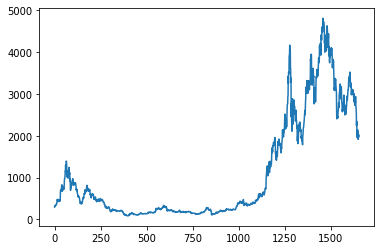

Plot After Scaling


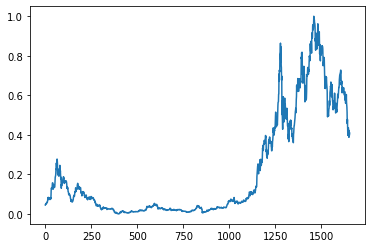

Scaling Delta Close
Plot Before Scaling


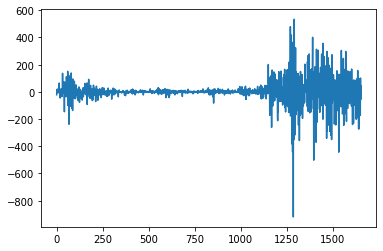

Plot After Scaling


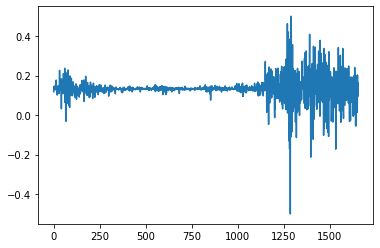

Scaling Delta Pct Close
################################################################
################## Executing for interval  3  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Percentage Close train, test length  1155 494
Close train shape, test sh

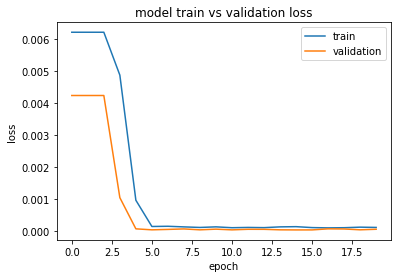

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_194 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_49 (Dropout)        (None, 100)               0         
                                                                 
 dense_217 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


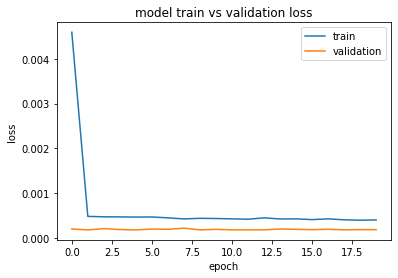

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_195 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_50 (Dropout)        (None, 100)               0         
                                                                 
 dense_218 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


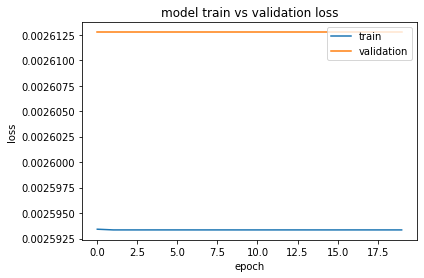

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_148"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_196 (LSTM)             (None, 3, 100)            40800     
                                                                 
 dropout_51 (Dropout)        (None, 3, 100)            0         
                                                                 
 lstm_197 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_52 (Dropout)        (None, 100)               0         
                                                                 
 dense_219 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_______________________________________________________________

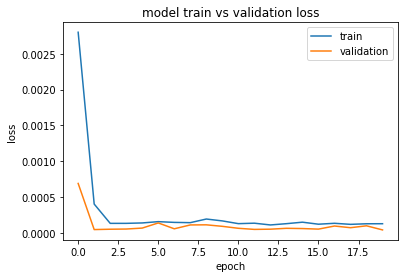

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_149"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_198 (LSTM)             (None, 3, 100)            40800     
                                                                 
 dropout_53 (Dropout)        (None, 3, 100)            0         
                                                                 
 lstm_199 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_54 (Dropout)        (None, 100)               0         
                                                                 
 dense_220 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________

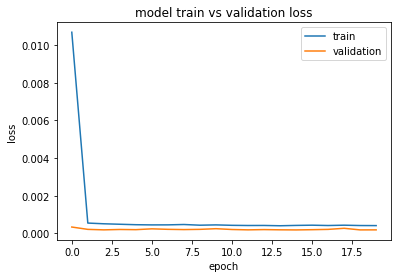

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_200 (LSTM)             (None, 3, 100)            40800     
                                                                 
 dropout_55 (Dropout)        (None, 3, 100)            0         
                                                                 
 lstm_201 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_56 (Dropout)        (None, 100)               0         
                                                                 
 dense_221 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
______________________________________________

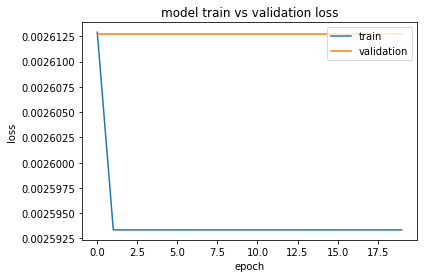

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_151"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 1, 8)              32        
                                                                 
 lstm_202 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_57 (Dropout)        (None, 100)               0         
                                                                 
 dense_222 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


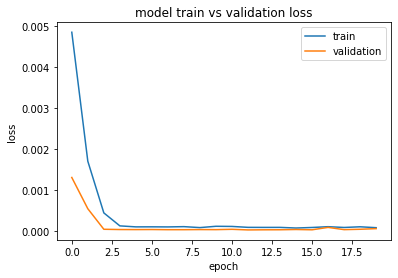

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_152"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_49 (Conv1D)          (None, 1, 8)              32        
                                                                 
 lstm_203 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_58 (Dropout)        (None, 100)               0         
                                                                 
 dense_223 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


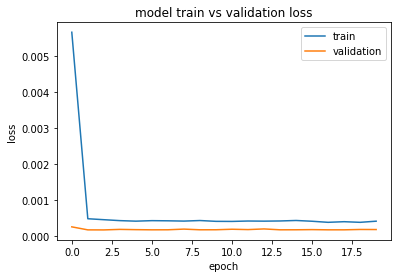

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_50 (Conv1D)          (None, 1, 8)              32        
                                                                 
 lstm_204 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_59 (Dropout)        (None, 100)               0         
                                                                 
 dense_224 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


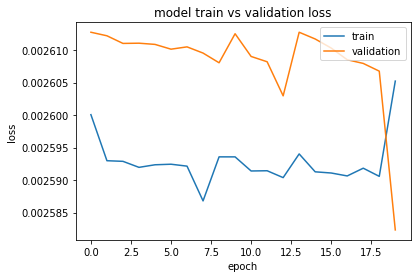

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     292.875122
1  0.053582      337.631012     299.408752
2  0.052678      333.356995     305.782654
3  0.052163      330.924011     315.373596
4  0.052474      332.394012     321.720428
5  0.055693      347.612000     319.556641
6  0.057126      354.385986     323.386139
7  0.059737      366.730011     331.164978
8  0.058398      360.401001     343.067688
9  0.062681      380.652008     348.143494

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1045.853149
1  0.230029    1171.834595   1081.083618
2  0.243080    1233.537598   1125.318726
3  0.242368    1230.172241   1158.505737
4  0.248102    1257.279541   1160.619507
5  0.273487    1377.295898   1188.703125
6  0.274540    1382.274048   1230.016479
7  0.219397    1121.570923   1278.990967
8  0.243709    1236.512207   1248.862915
9  0.242541    1230.990601   1200.895996

RMSE Train = 38.78439847096206
RMSE Test = 281.3941445882975
MAPE Train = 0.07673913618864582
MAPE Test = 0.06880780792120654
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


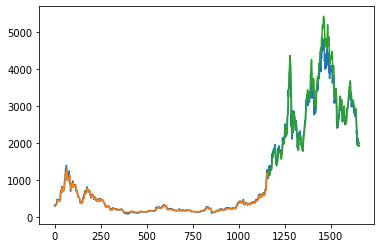

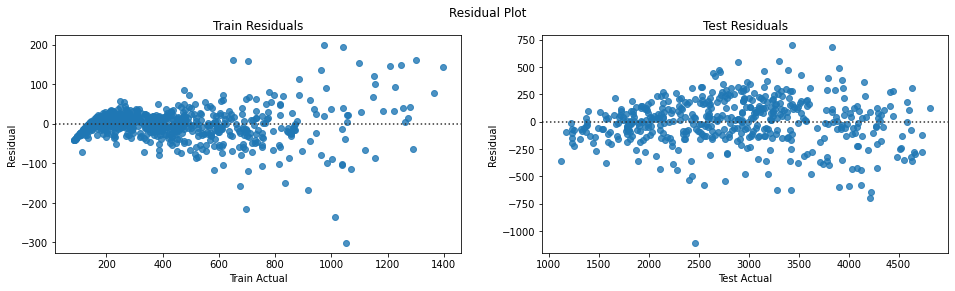

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -0.348709
1  0.146969       20.915009       0.847168
2  0.129638       -4.274017       1.299850
3  0.130904       -2.432984       1.136683
4  0.133590        1.470001       0.595596
5  0.143049       15.217988      -0.061403
6  0.137239        6.773986       0.860877
7  0.141072       12.344025       1.173111
8  0.128224       -6.329010       1.597314
9  0.146512       20.251007       0.591264

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -3.561343
1  0.100503     -46.618408      6.527747
2  0.175033      61.703003      4.780819
3  0.130263      -3.365357      4.449461
4  0.151229      27.107300      0.881365
5  0.215155     120.016357      3.617255
6  0.136004       4.978150      7.163824
7 -0.046796    -260.703125      6.522159
8  0.211663     114.941284     -6.071304
9  0.128779      -5.521606     -2.593562

RMSE Train = 25.11129199706209
RMSE Test = 142.39918905534705
MAPE Train = 1.4265641327875114
MAPE Test = 1.0850742873989725
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


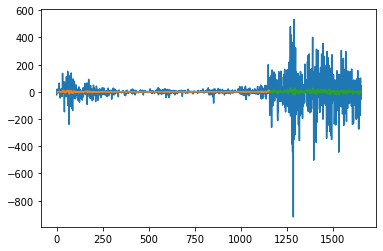

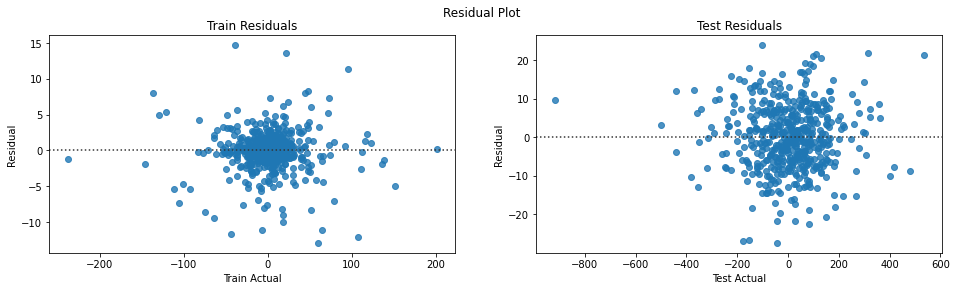

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606            0.0
1  0.066037        0.066037            0.0
2 -0.012659       -0.012659            0.0
3 -0.007298       -0.007298            0.0
4  0.004442        0.004442            0.0
5  0.045783        0.045783            0.0
6  0.019487        0.019487            0.0
7  0.034832        0.034832            0.0
8 -0.017258       -0.017258            0.0
9  0.056190        0.056190            0.0

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572           0.0
1 -0.038260      -0.038260           0.0
2  0.052655       0.052655           0.0
3 -0.002728      -0.002728           0.0
4  0.022035       0.022035           0.0
5  0.095457       0.095457           0.0
6  0.003614       0.003614           0.0
7 -0.188605      -0.188605           0.0
8  0.102482       0.102482           0.0
9 -0.004465      -0.004465           0.0

RMSE Train = 0.050987869496074166
RMSE Test = 0.050825255223530895
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


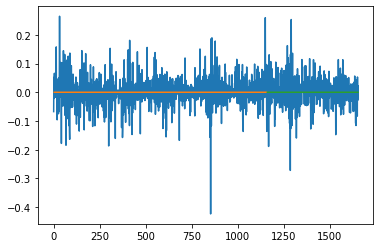

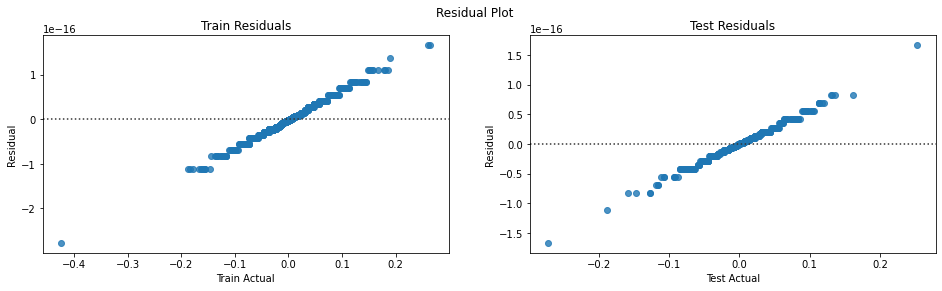

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     314.242065
1  0.053582      337.631012     321.693054
2  0.052678      333.356995     325.173279
3  0.052163      330.924011     336.587585
4  0.052474      332.394012     345.564209
5  0.055693      347.612000     342.724670
6  0.057126      354.385986     344.881683
7  0.059737      366.730011     352.431000
8  0.058398      360.401001     365.142059
9  0.062681      380.652008     371.875336

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1097.305176
1  0.230029    1171.834595   1119.916504
2  0.243080    1233.537598   1171.073486
3  0.242368    1230.172241   1204.115601
4  0.248102    1257.279541   1202.207886
5  0.273487    1377.295898   1230.655273
6  0.274540    1382.274048   1256.448975
7  0.219397    1121.570923   1302.312500
8  0.243709    1236.512207   1304.832642
9  0.242541    1230.990601   1255.372803

RMSE Train = 38.09197361641764
RMSE Test = 240.72839298640326
MAPE Train = 0.07088464529435616
MAPE Test = 0.06884750341003285
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


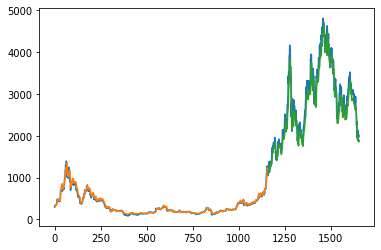

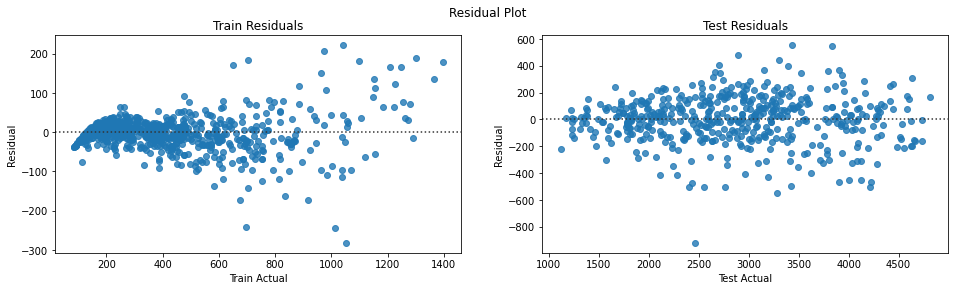

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013       0.568567
1  0.146969       20.915009       1.166029
2  0.129638       -4.274017       1.123126
3  0.130904       -2.432984       1.391266
4  0.133590        1.470001       1.195960
5  0.143049       15.217988       0.715664
6  0.137239        6.773986       1.006284
7  0.141072       12.344025       1.255063
8  0.128224       -6.329010       1.469298
9  0.146512       20.251007       1.153143

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -2.762749
1  0.100503     -46.618408      2.589569
2  0.175033      61.703003      3.913961
3  0.130263      -3.365357      2.675743
4  0.151229      27.107300      0.948957
5  0.215155     120.016357      2.499041
6  0.136004       4.978150      2.801031
7 -0.046796    -260.703125      3.840131
8  0.211663     114.941284      0.837552
9  0.128779      -5.521606     -1.983235

RMSE Train = 25.15385710377097
RMSE Test = 141.83147083176422
MAPE Train = 1.7225700223348421
MAPE Test = 1.0339623644718223
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


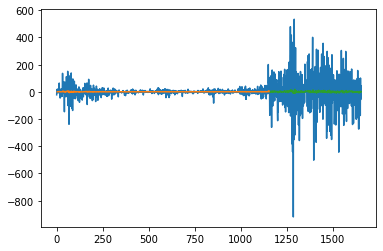

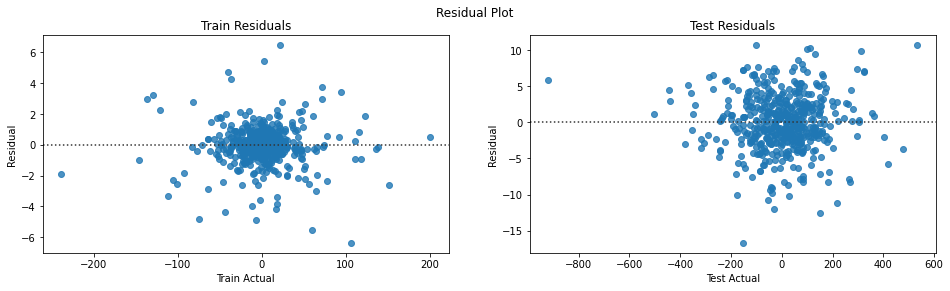

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606            0.0
1  0.066037        0.066037            0.0
2 -0.012659       -0.012659            0.0
3 -0.007298       -0.007298            0.0
4  0.004442        0.004442            0.0
5  0.045783        0.045783            0.0
6  0.019487        0.019487            0.0
7  0.034832        0.034832            0.0
8 -0.017258       -0.017258            0.0
9  0.056190        0.056190            0.0

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572           0.0
1 -0.038260      -0.038260           0.0
2  0.052655       0.052655           0.0
3 -0.002728      -0.002728           0.0
4  0.022035       0.022035           0.0
5  0.095457       0.095457           0.0
6  0.003614       0.003614           0.0
7 -0.188605      -0.188605           0.0
8  0.102482       0.102482           0.0
9 -0.004465      -0.004465           0.0

RMSE Train = 0.050987869496074166
RMSE Test = 0.050825255223530895
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


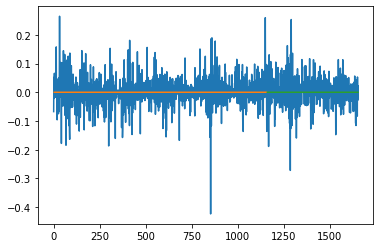

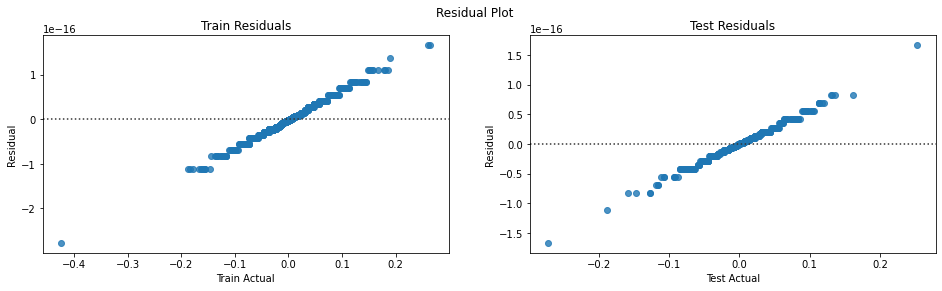

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     289.247498
1  0.053582      337.631012     292.458740
2  0.052678      333.356995     306.326538
3  0.052163      330.924011     313.637787
4  0.052474      332.394012     312.594879
5  0.055693      347.612000     311.923096
6  0.057126      354.385986     320.548859
7  0.059737      366.730011     331.007843
8  0.058398      360.401001     342.277313
9  0.062681      380.652008     344.915039

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1040.039917
1  0.230029    1171.834595   1113.842651
2  0.243080    1233.537598   1133.024048
3  0.242368    1230.172241   1151.838989
4  0.248102    1257.279541   1171.242920
5  0.273487    1377.295898   1188.355835
6  0.274540    1382.274048   1259.097412
7  0.219397    1121.570923   1313.096558
8  0.243709    1236.512207   1194.085083
9  0.242541    1230.990601   1146.338623

RMSE Train = 37.50916780801347
RMSE Test = 302.62206212927083
MAPE Train = 0.08311540726192468
MAPE Test = 0.07072550404970841
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


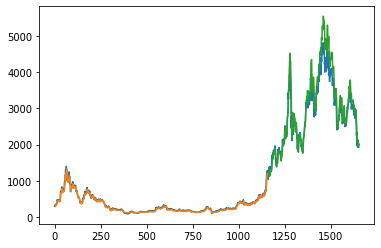

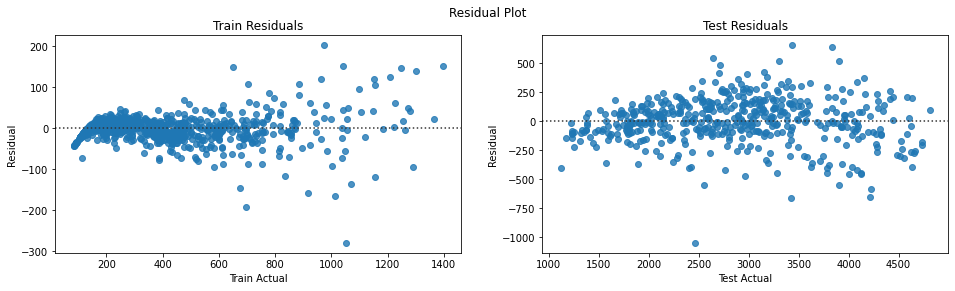

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -2.064321
1  0.146969       20.915009      -0.580508
2  0.129638       -4.274017       0.132409
3  0.130904       -2.432984      -0.764834
4  0.133590        1.470001      -1.125343
5  0.143049       15.217988      -1.558014
6  0.137239        6.773986      -0.390746
7  0.141072       12.344025      -0.400037
8  0.128224       -6.329010       0.128446
9  0.146512       20.251007      -1.266982

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -2.119937
1  0.100503     -46.618408      6.349203
2  0.175033      61.703003     -1.006682
3  0.130263      -3.365357      4.035502
4  0.151229      27.107300     -1.410484
5  0.215155     120.016357      2.257951
6  0.136004       4.978150      7.909921
7 -0.046796    -260.703125      2.267177
8  0.211663     114.941284    -21.241777
9  0.128779      -5.521606     -2.541671

RMSE Train = 25.15926946767822
RMSE Test = 142.70864512198335
MAPE Train = 2.7102123305761574
MAPE Test = 1.1024859396716675
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


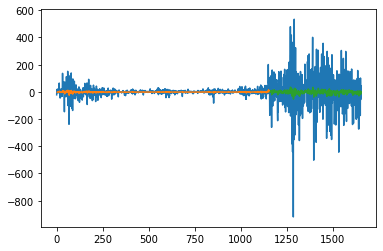

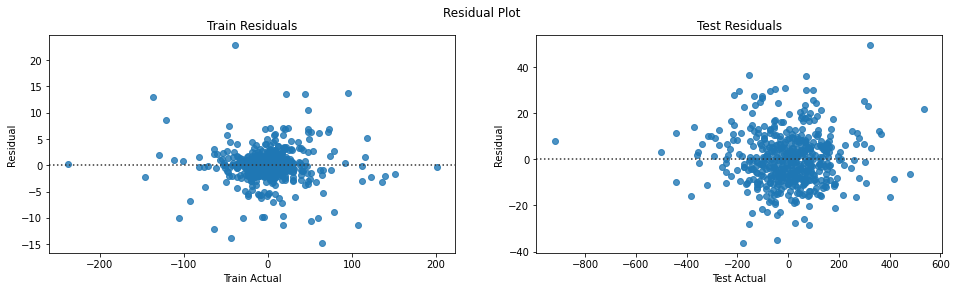

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606       0.002073
1  0.066037        0.066037       0.000000
2 -0.012659       -0.012659       0.009065
3 -0.007298       -0.007298       0.002435
4  0.004442        0.004442       0.000000
5  0.045783        0.045783       0.000000
6  0.019487        0.019487       0.004389
7  0.034832        0.034832       0.005313
8 -0.017258       -0.017258       0.004014
9  0.056190        0.056190       0.000066

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572      0.004133
1 -0.038260      -0.038260      0.015799
2  0.052655       0.052655      0.000000
3 -0.002728      -0.002728      0.000891
4  0.022035       0.022035      0.003949
5  0.095457       0.095457      0.000752
6  0.003614       0.003614      0.011535
7 -0.188605      -0.188605      0.006067
8  0.102482       0.102482      0.000000
9 -0.004465      -0.004465      0.000000

RMSE Train = 0.05081257363480148
RMSE Test = 0.05089665276365464
MAPE Train = 1.2084113807252248
MAPE Test = 1.0939138212891197
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


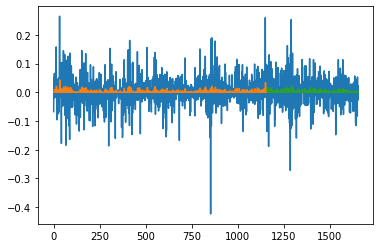

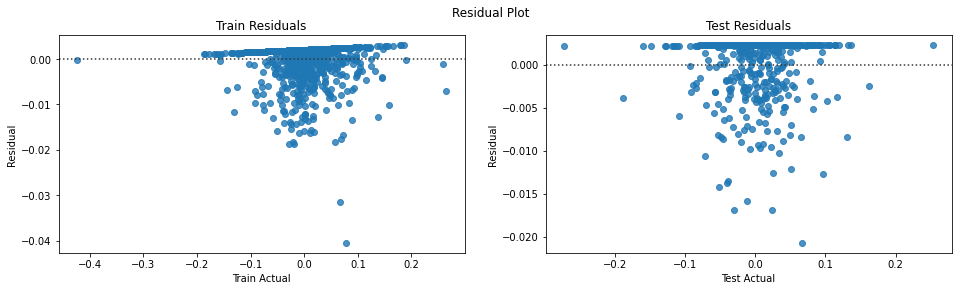

----------------------------


model  interval                            target  rmse_train  \
0          LSTM       3.0                             Close   38.784398   
1          LSTM       3.0             Change in Close Price   25.111292   
2          LSTM       3.0  Percentage Change in Close Price    0.050988   
3  Stacked LSTM       3.0                             Close   38.091974   
4  Stacked LSTM       3.0             Change in Close Price   25.153857   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
6      CNN-LSTM       3.0                             Close   37.509168   
7      CNN-LSTM       3.0             Change in Close Price   25.159269   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.050813   

    rmse_test  mape_train  mape_test  
0  281.394145    0.076739   0.068808  
1  142.399189    1.426564   1.085074  
2    0.050825    1.000000   1.000000  
3  240.728393    0.070885   0.068848  
4  141.831471    1.722570   1.033962  
5    0.050825    1.000000   1.000000  
6  302.622062    0.083115   0.070726  
7  142.708645    2.710212   1.102486  
8    0.050897    1.208411   1.093914

################################################################
################## Executing for interval  5  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Percentage Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,

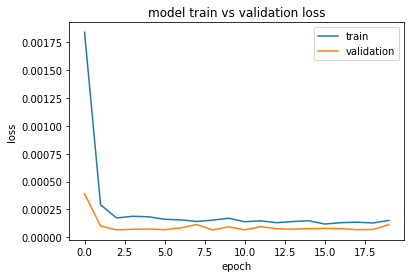

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_206 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_61 (Dropout)        (None, 100)               0         
                                                                 
 dense_226 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


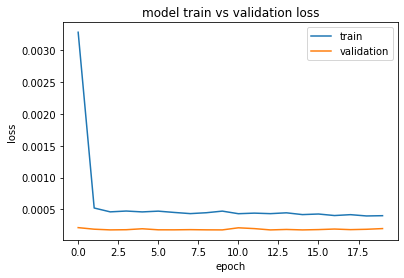

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_156"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_207 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_62 (Dropout)        (None, 100)               0         
                                                                 
 dense_227 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


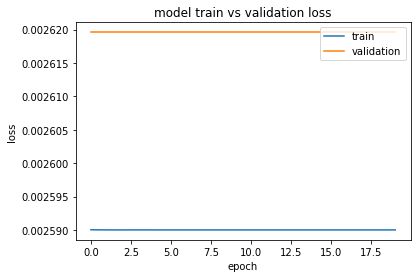

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_157"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_208 (LSTM)             (None, 5, 100)            40800     
                                                                 
 dropout_63 (Dropout)        (None, 5, 100)            0         
                                                                 
 lstm_209 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_64 (Dropout)        (None, 100)               0         
                                                                 
 dense_228 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_______________________________________________________________

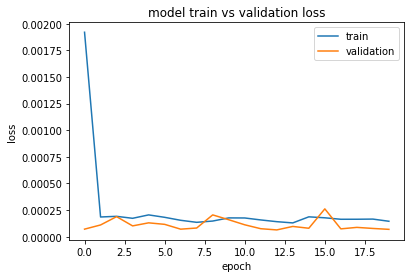

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_210 (LSTM)             (None, 5, 100)            40800     
                                                                 
 dropout_65 (Dropout)        (None, 5, 100)            0         
                                                                 
 lstm_211 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_66 (Dropout)        (None, 100)               0         
                                                                 
 dense_229 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________

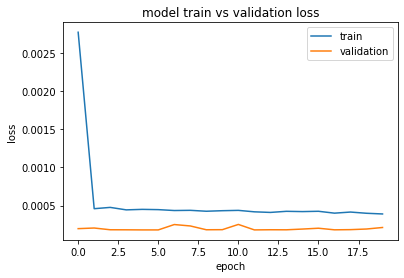

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_159"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_212 (LSTM)             (None, 5, 100)            40800     
                                                                 
 dropout_67 (Dropout)        (None, 5, 100)            0         
                                                                 
 lstm_213 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_68 (Dropout)        (None, 100)               0         
                                                                 
 dense_230 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
______________________________________________

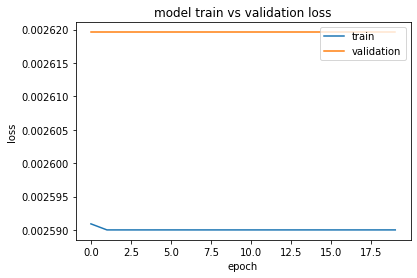

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_160"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 3, 8)              32        
                                                                 
 lstm_214 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_69 (Dropout)        (None, 100)               0         
                                                                 
 dense_231 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


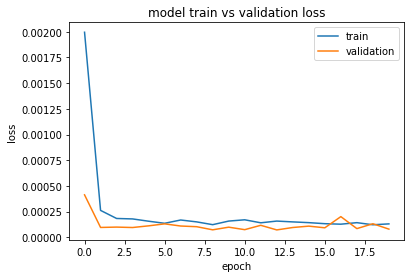

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_161"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_52 (Conv1D)          (None, 3, 8)              32        
                                                                 
 lstm_215 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_70 (Dropout)        (None, 100)               0         
                                                                 
 dense_232 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


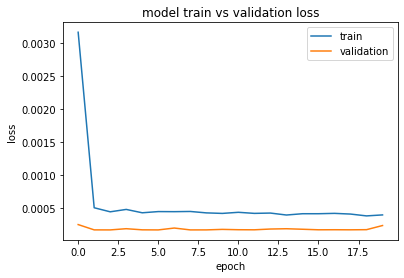

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_53 (Conv1D)          (None, 3, 8)              32        
                                                                 
 lstm_216 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_71 (Dropout)        (None, 100)               0         
                                                                 
 dense_233 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


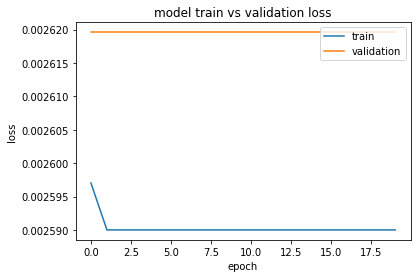

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     282.284149
1  0.052163      330.924011     290.179352
2  0.052474      332.394012     294.033447
3  0.055693      347.612000     299.362000
4  0.057126      354.385986     306.016815
5  0.059737      366.730011     310.146820
6  0.058398      360.401001     317.956848
7  0.062681      380.652008     324.541016
8  0.068924      410.165985     335.239136
9  0.082619      474.911011     349.590302

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1092.640625
1  0.242368    1230.172241   1119.526489
2  0.248102    1257.279541   1148.618042
3  0.273487    1377.295898   1170.058594
4  0.274540    1382.274048   1202.688599
5  0.219397    1121.570923   1239.201904
6  0.243709    1236.512207   1205.870361
7  0.242541    1230.990601   1204.523071
8  0.276515    1391.609375   1202.766235
9  0.262302    1324.414795   1215.639160

RMSE Train = 48.403469235297074
RMSE Test = 233.14876283658052
MAPE Train = 0.11509138186306474
MAPE Test = 0.06821001512756884
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


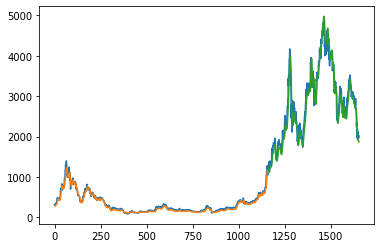

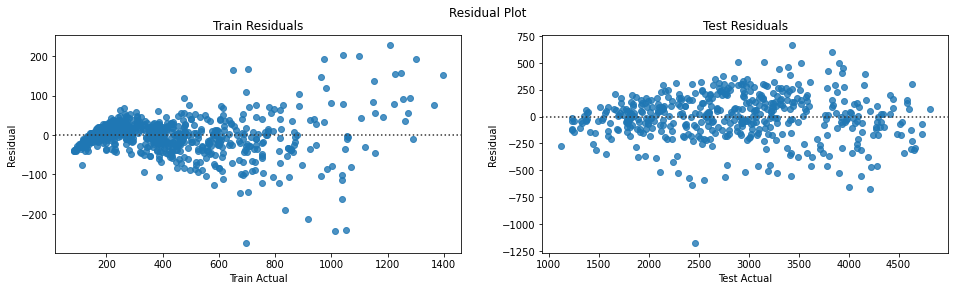

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -3.049991
1  0.130904       -2.432984      -3.082304
2  0.133590        1.470001      -3.670063
3  0.143049       15.217988      -3.569227
4  0.137239        6.773986      -3.083712
5  0.141072       12.344025      -3.322116
6  0.128224       -6.329010      -2.784926
7  0.146512       20.251007      -3.301195
8  0.152885       29.513977      -2.485621
9  0.177126       64.745026      -1.611465

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -4.924372
1  0.130263      -3.365357      1.315184
2  0.151229      27.107300      0.951859
3  0.215155     120.016357     -0.215322
4  0.136004       4.978150      3.400508
5 -0.046796    -260.703125      3.070969
6  0.211663     114.941284    -11.256243
7  0.128779      -5.521606     -4.389912
8  0.243091     160.618774     -5.123144
9  0.086346     -67.194580      0.769136

RMSE Train = 25.598984988608503
RMSE Test = 142.77293931743043
MAPE Train = 6.0293803088635745
MAPE Test = 1.0872739173282489
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


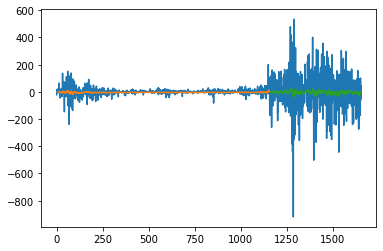

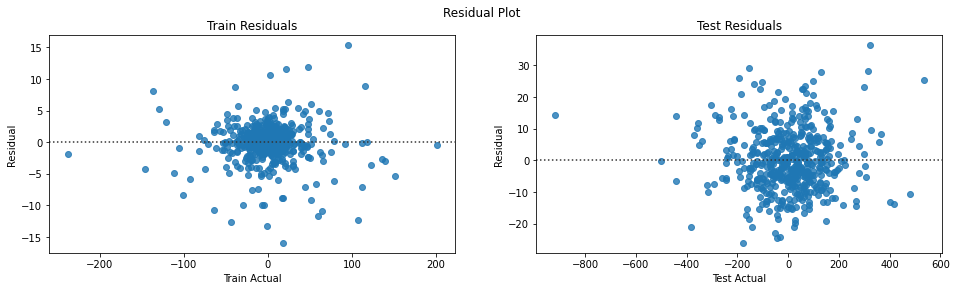

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659            0.0
1 -0.007298       -0.007298            0.0
2  0.004442        0.004442            0.0
3  0.045783        0.045783            0.0
4  0.019487        0.019487            0.0
5  0.034832        0.034832            0.0
6 -0.017258       -0.017258            0.0
7  0.056190        0.056190            0.0
8  0.077535        0.077535            0.0
9  0.157851        0.157851            0.0

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655           0.0
1 -0.002728      -0.002728           0.0
2  0.022035       0.022035           0.0
3  0.095457       0.095457           0.0
4  0.003614       0.003614           0.0
5 -0.188605      -0.188605           0.0
6  0.102482       0.102482           0.0
7 -0.004465      -0.004465           0.0
8  0.130479       0.130479           0.0
9 -0.048286      -0.048286           0.0

RMSE Train = 0.050988042345332704
RMSE Test = 0.05077894844694595
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


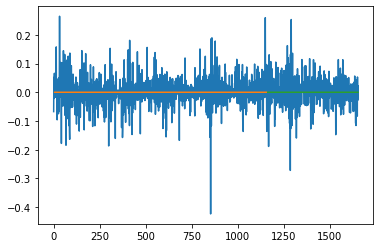

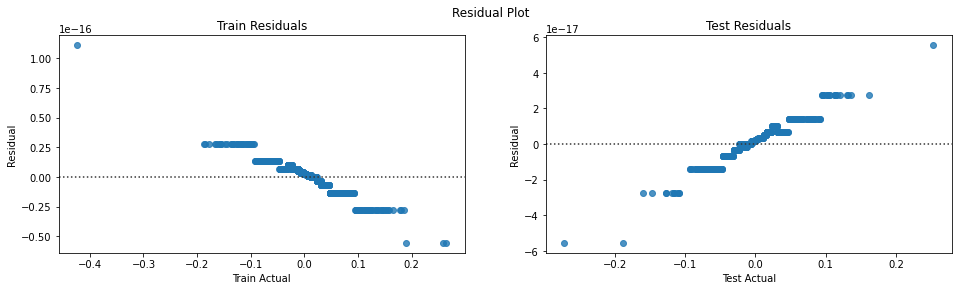

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     334.734955
1  0.052163      330.924011     342.708954
2  0.052474      332.394012     347.347137
3  0.055693      347.612000     353.124481
4  0.057126      354.385986     358.664154
5  0.059737      366.730011     361.855988
6  0.058398      360.401001     368.789917
7  0.062681      380.652008     376.333313
8  0.068924      410.165985     386.045013
9  0.082619      474.911011     397.630768

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1124.602295
1  0.242368    1230.172241   1149.412964
2  0.248102    1257.279541   1184.992188
3  0.273487    1377.295898   1206.911621
4  0.274540    1382.274048   1232.562378
5  0.219397    1121.570923   1270.869019
6  0.243709    1236.512207   1259.854736
7  0.242541    1230.990601   1252.474854
8  0.276515    1391.609375   1250.859375
9  0.262302    1324.414795   1247.727905

RMSE Train = 44.790687075867396
RMSE Test = 253.85032515536554
MAPE Train = 0.0955433888553705
MAPE Test = 0.07176630941876858
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


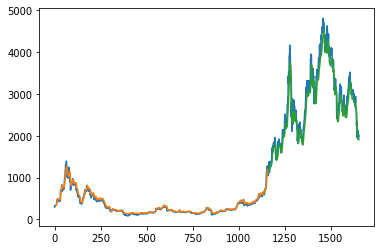

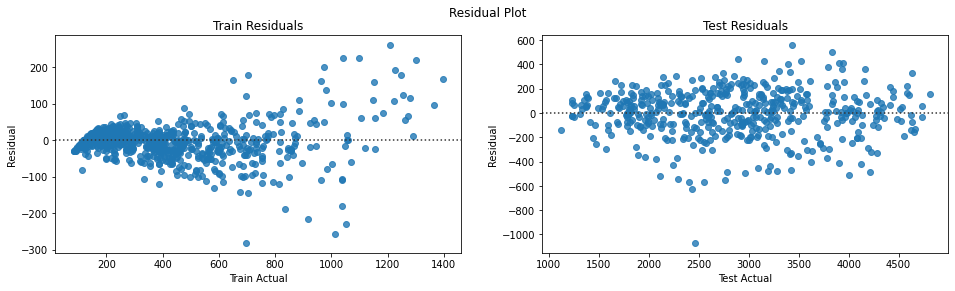

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -5.154893
1  0.130904       -2.432984      -4.912027
2  0.133590        1.470001      -5.071166
3  0.143049       15.217988      -5.023563
4  0.137239        6.773986      -5.020228
5  0.141072       12.344025      -5.122212
6  0.128224       -6.329010      -4.952700
7  0.146512       20.251007      -4.935851
8  0.152885       29.513977      -4.832870
9  0.177126       64.745026      -4.721703

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -5.590034
1  0.130263      -3.365357     -3.792709
2  0.151229      27.107300     -3.334244
3  0.215155     120.016357     -4.037849
4  0.136004       4.978150     -3.922480
5 -0.046796    -260.703125     -3.085942
6  0.211663     114.941284     -4.612420
7  0.128779      -5.521606     -4.297954
8  0.243091     160.618774     -4.532417
9  0.086346     -67.194580     -4.495968

RMSE Train = 25.905455256412754
RMSE Test = 142.17128556775816
MAPE Train = 7.337564919965721
MAPE Test = 1.0324502849431672
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


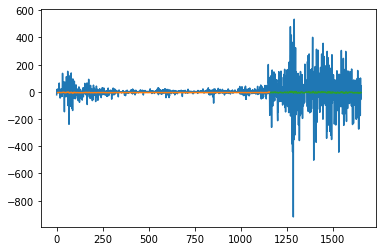

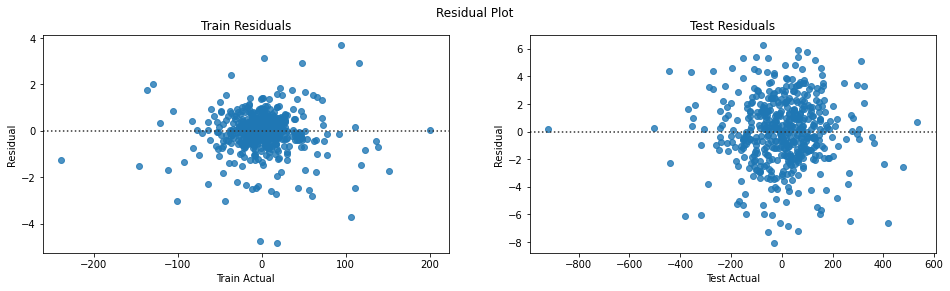

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659            0.0
1 -0.007298       -0.007298            0.0
2  0.004442        0.004442            0.0
3  0.045783        0.045783            0.0
4  0.019487        0.019487            0.0
5  0.034832        0.034832            0.0
6 -0.017258       -0.017258            0.0
7  0.056190        0.056190            0.0
8  0.077535        0.077535            0.0
9  0.157851        0.157851            0.0

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655           0.0
1 -0.002728      -0.002728           0.0
2  0.022035       0.022035           0.0
3  0.095457       0.095457           0.0
4  0.003614       0.003614           0.0
5 -0.188605      -0.188605           0.0
6  0.102482       0.102482           0.0
7 -0.004465      -0.004465           0.0
8  0.130479       0.130479           0.0
9 -0.048286      -0.048286           0.0

RMSE Train = 0.050988042345332704
RMSE Test = 0.05077894844694595
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


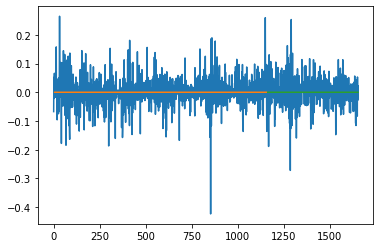

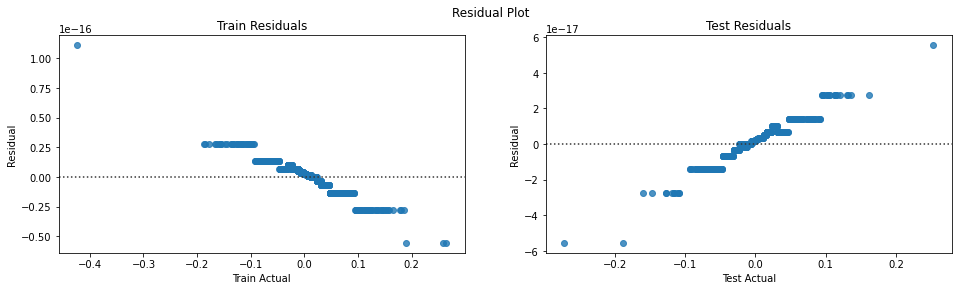

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     313.674622
1  0.052163      330.924011     321.755341
2  0.052474      332.394012     330.080231
3  0.055693      347.612000     334.698364
4  0.057126      354.385986     336.395142
5  0.059737      366.730011     340.021027
6  0.058398      360.401001     348.444031
7  0.062681      380.652008     358.008392
8  0.068924      410.165985     366.024841
9  0.082619      474.911011     374.717346

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1074.168091
1  0.242368    1230.172241   1109.982544
2  0.248102    1257.279541   1135.635376
3  0.273487    1377.295898   1152.763672
4  0.274540    1382.274048   1174.111816
5  0.219397    1121.570923   1212.521484
6  0.243709    1236.512207   1240.126831
7  0.242541    1230.990601   1222.311768
8  0.276515    1391.609375   1178.822998
9  0.262302    1324.414795   1165.267456

RMSE Train = 44.29833406484441
RMSE Test = 270.2124516391081
MAPE Train = 0.06914694144872913
MAPE Test = 0.08031933216237477
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


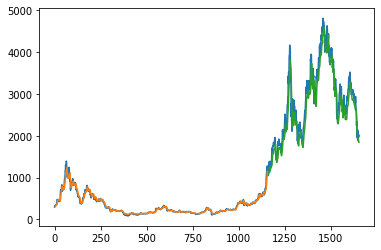

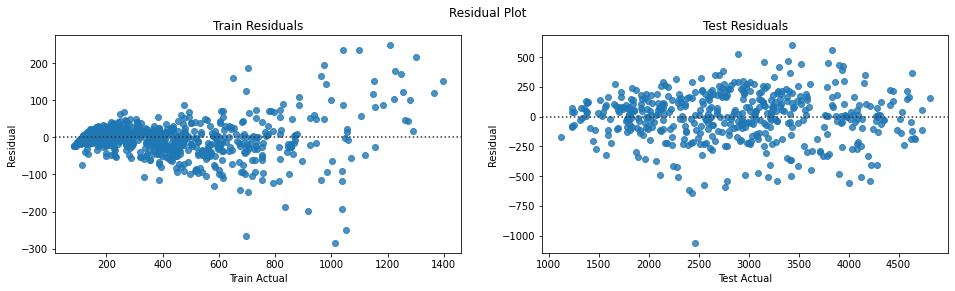

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -8.371144
1  0.130904       -2.432984      -8.061054
2  0.133590        1.470001      -8.409521
3  0.143049       15.217988      -8.718355
4  0.137239        6.773986      -8.385308
5  0.141072       12.344025      -8.350829
6  0.128224       -6.329010      -7.836596
7  0.146512       20.251007      -8.265391
8  0.152885       29.513977      -7.797094
9  0.177126       64.745026      -7.354590

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -9.634333
1  0.130263      -3.365357     -5.754586
2  0.151229      27.107300     -6.165167
3  0.215155     120.016357     -5.646386
4  0.136004       4.978150     -4.616101
5 -0.046796    -260.703125     -3.256797
6  0.211663     114.941284     -9.000854
7  0.128779      -5.521606      3.559993
8  0.243091     160.618774     -2.997905
9  0.086346     -67.194580      1.005721

RMSE Train = 26.86532222373657
RMSE Test = 143.2169473007062
MAPE Train = 12.306716385178996
MAPE Test = 1.069858047079055
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


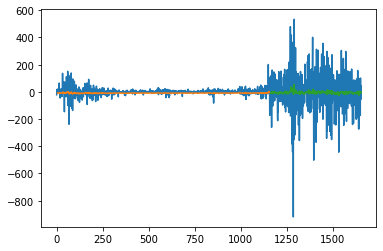

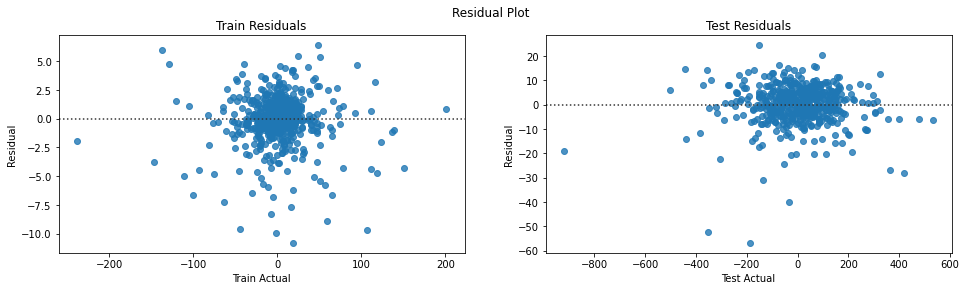

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659            0.0
1 -0.007298       -0.007298            0.0
2  0.004442        0.004442            0.0
3  0.045783        0.045783            0.0
4  0.019487        0.019487            0.0
5  0.034832        0.034832            0.0
6 -0.017258       -0.017258            0.0
7  0.056190        0.056190            0.0
8  0.077535        0.077535            0.0
9  0.157851        0.157851            0.0

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655           0.0
1 -0.002728      -0.002728           0.0
2  0.022035       0.022035           0.0
3  0.095457       0.095457           0.0
4  0.003614       0.003614           0.0
5 -0.188605      -0.188605           0.0
6  0.102482       0.102482           0.0
7 -0.004465      -0.004465           0.0
8  0.130479       0.130479           0.0
9 -0.048286      -0.048286           0.0

RMSE Train = 0.050988042345332704
RMSE Test = 0.05077894844694595
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


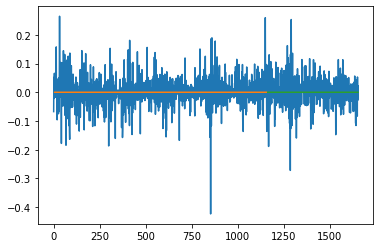

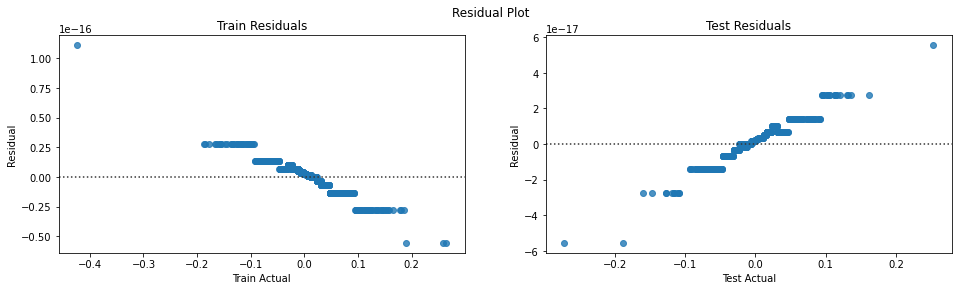

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   38.784398   
1           LSTM       3.0             Change in Close Price   25.111292   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
3   Stacked LSTM       3.0                             Close   38.091974   
4   Stacked LSTM       3.0             Change in Close Price   25.153857   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
6       CNN-LSTM       3.0                             Close   37.509168   
7       CNN-LSTM       3.0             Change in Close Price   25.159269   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050813   
9           LSTM       5.0                             Close   48.403469   
10          LSTM       5.0             Change in Close Price   25.598985   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
12  Stacked LSTM       5.0                             Close   44.790687   
13  Stacked LSTM       5.0             Change in Close Price   25.905455   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
15      CNN-LSTM       5.0                             Close   44.298334   
16      CNN-LSTM       5.0             Change in Close Price   26.865322   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   

     rmse_test  mape_train  mape_test  
0   281.394145    0.076739   0.068808  
1   142.399189    1.426564   1.085074  
2     0.050825    1.000000   1.000000  
3   240.728393    0.070885   0.068848  
4   141.831471    1.722570   1.033962  
5     0.050825    1.000000   1.000000  
6   302.622062    0.083115   0.070726  
7   142.708645    2.710212   1.102486  
8     0.050897    1.208411   1.093914  
9   233.148763    0.115091   0.068210  
10  142.772939    6.029380   1.087274  
11    0.050779    1.000000   1.000000  
12  253.850325    0.095543   0.071766  
13  142.171286    7.337565   1.032450  
14    0.050779    1.000000   1.000000  
15  270.212452    0.069147   0.080319  
16  143.216947   12.306716   1.069858  
17    0.050779    1.000000   1.000000

################################################################
################## Executing for interval  10  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Percentage Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) 

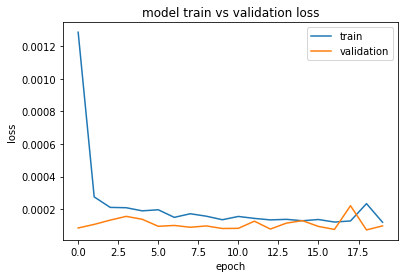

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_164"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_218 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_73 (Dropout)        (None, 100)               0         
                                                                 
 dense_235 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


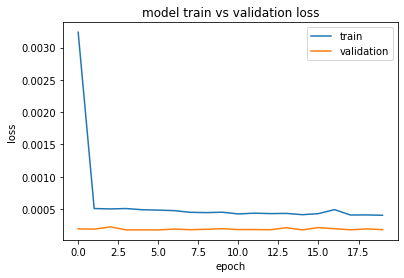

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_165"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_219 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_74 (Dropout)        (None, 100)               0         
                                                                 
 dense_236 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


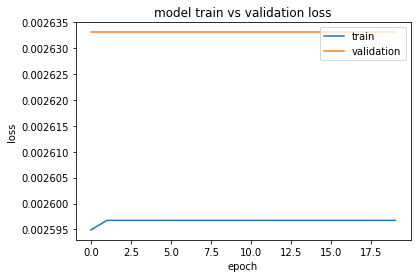

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_166"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_220 (LSTM)             (None, 10, 100)           40800     
                                                                 
 dropout_75 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_221 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_76 (Dropout)        (None, 100)               0         
                                                                 
 dense_237 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_______________________________________________________________

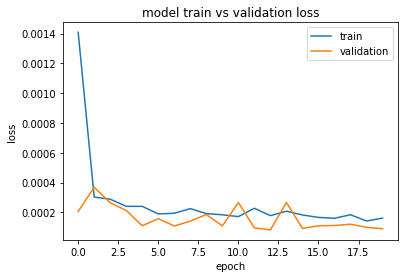

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_167"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_222 (LSTM)             (None, 10, 100)           40800     
                                                                 
 dropout_77 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_223 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_78 (Dropout)        (None, 100)               0         
                                                                 
 dense_238 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________

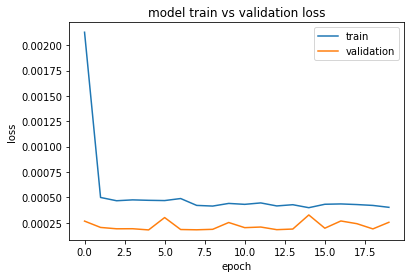

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_168"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_224 (LSTM)             (None, 10, 100)           40800     
                                                                 
 dropout_79 (Dropout)        (None, 10, 100)           0         
                                                                 
 lstm_225 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_80 (Dropout)        (None, 100)               0         
                                                                 
 dense_239 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
______________________________________________

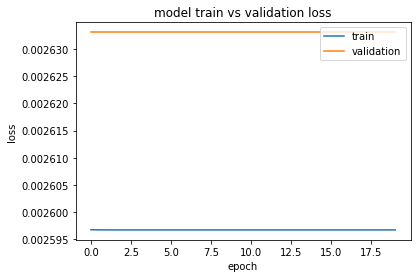

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_54 (Conv1D)          (None, 8, 8)              32        
                                                                 
 lstm_226 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_81 (Dropout)        (None, 100)               0         
                                                                 
 dense_240 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


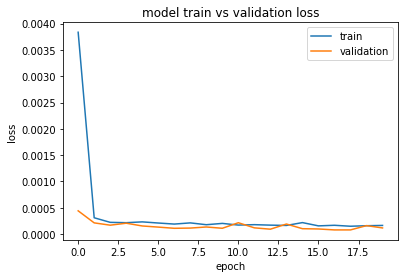

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_170"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_55 (Conv1D)          (None, 8, 8)              32        
                                                                 
 lstm_227 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_82 (Dropout)        (None, 100)               0         
                                                                 
 dense_241 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


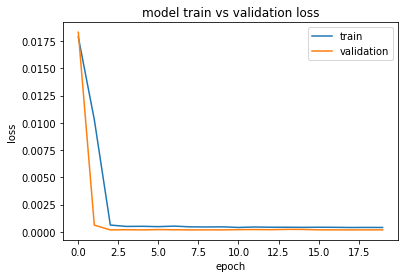

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_56 (Conv1D)          (None, 8, 8)              32        
                                                                 
 lstm_228 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_83 (Dropout)        (None, 100)               0         
                                                                 
 dense_242 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


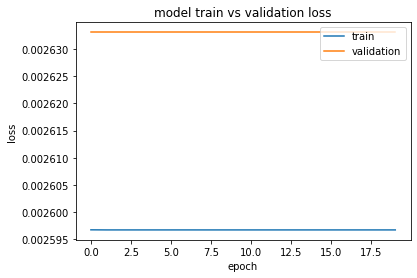

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     316.556946
1  0.058398      360.401001     324.698151
2  0.062681      380.652008     329.704773
3  0.068924      410.165985     338.352448
4  0.082619      474.911011     352.619049
5  0.080792      466.276001     380.742950
6  0.081861      471.329987     402.243622
7  0.083770      480.355011     420.449127
8  0.082194      472.902008     436.421356
9  0.072595      427.523010     446.317261

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1267.589600
1  0.243709    1236.512207   1227.521362
2  0.242541    1230.990601   1216.426270
3  0.276515    1391.609375   1202.885864
4  0.262302    1324.414795   1236.484619
5  0.269207    1357.058105   1255.178955
6  0.247236    1253.187134   1282.803223
7  0.264011    1332.492188   1269.503662
8  0.274593    1382.522827   1274.164307
9  0.273238    1376.115479   1290.717651

RMSE Train = 45.52959542411802
RMSE Test = 197.2451001608118
MAPE Train = 0.10237437825336952
MAPE Test = 0.05587196814838232
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


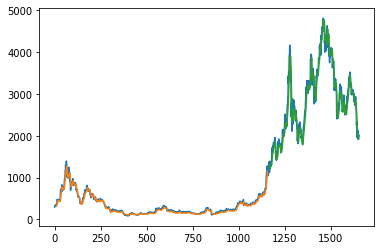

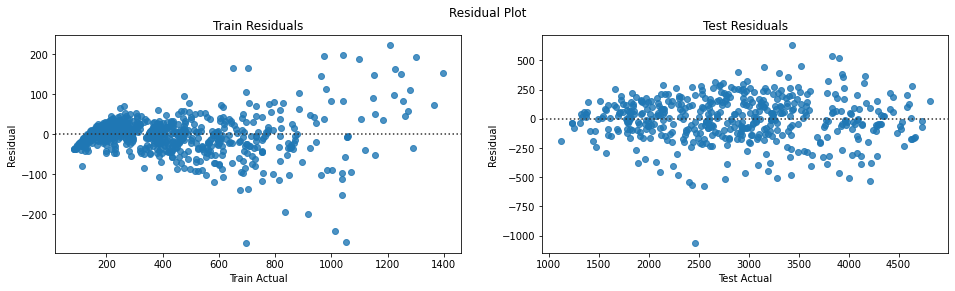

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025       1.004465
1  0.128224       -6.329010       1.356809
2  0.146512       20.251007       0.638932
3  0.152885       29.513977       1.459595
4  0.177126       64.745026       2.470085
5  0.126637       -8.635010       4.927959
6  0.136056        5.053986       3.151361
7  0.138788        9.025024       2.551170
8  0.127450       -7.453003       2.284330
9  0.101356      -45.378998       1.256709

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125      6.018841
1  0.211663     114.941284     -7.171325
2  0.128779      -5.521606      0.534132
3  0.243091     160.618774     -0.172917
4  0.086346     -67.194580      7.661489
5  0.155038      32.643310      2.252883
6  0.061111    -103.870971      3.139211
7  0.187144      79.305054     -2.820163
8  0.167002      50.030639      1.838924
9  0.128170      -6.407348      3.575499

RMSE Train = 25.180045326361935
RMSE Test = 143.14041032885154
MAPE Train = 1.3174089456001146
MAPE Test = 1.0941157520924762
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


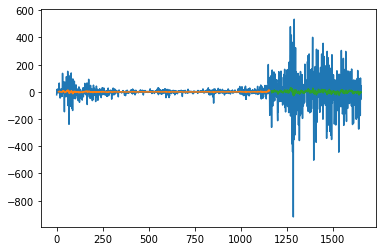

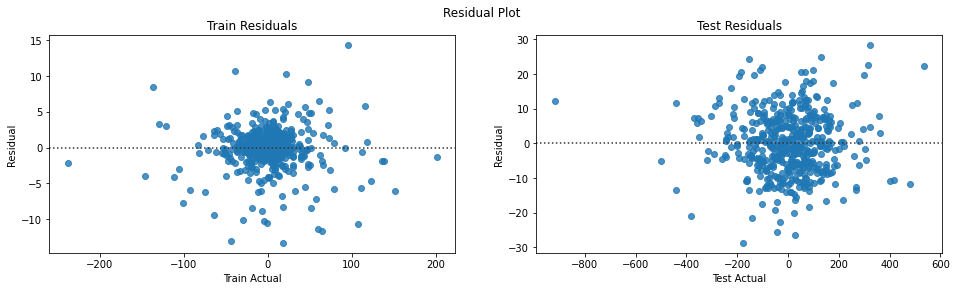

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832            0.0
1 -0.017258       -0.017258            0.0
2  0.056190        0.056190            0.0
3  0.077535        0.077535            0.0
4  0.157851        0.157851            0.0
5 -0.018182       -0.018182            0.0
6  0.010839        0.010839            0.0
7  0.019148        0.019148            0.0
8 -0.015516       -0.015516            0.0
9 -0.095959       -0.095959            0.0

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605           0.0
1  0.102482       0.102482           0.0
2 -0.004465      -0.004465           0.0
3  0.130479       0.130479           0.0
4 -0.048286      -0.048286           0.0
5  0.024647       0.024647           0.0
6 -0.076541      -0.076541           0.0
7  0.063283       0.063283           0.0
8  0.037547       0.037547           0.0
9 -0.004635      -0.004635           0.0

RMSE Train = 0.05107586243829624
RMSE Test = 0.050789093609195264
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


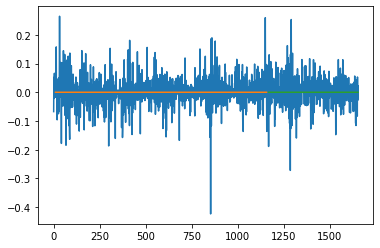

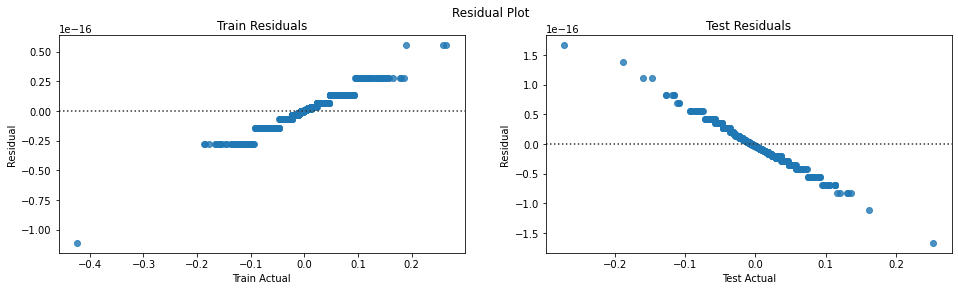

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     332.563324
1  0.058398      360.401001     340.117676
2  0.062681      380.652008     346.486267
3  0.068924      410.165985     354.313965
4  0.082619      474.911011     366.421753
5  0.080792      466.276001     389.149506
6  0.081861      471.329987     413.026764
7  0.083770      480.355011     434.471588
8  0.082194      472.902008     452.524872
9  0.072595      427.523010     464.773468

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1216.494629
1  0.243709    1236.512207   1204.812134
2  0.242541    1230.990601   1187.710205
3  0.276515    1391.609375   1169.579956
4  0.262302    1324.414795   1178.751465
5  0.269207    1357.058105   1190.269653
6  0.247236    1253.187134   1210.958496
7  0.264011    1332.492188   1216.691406
8  0.274593    1382.522827   1224.207886
9  0.273238    1376.115479   1236.763550

RMSE Train = 45.50611100791412
RMSE Test = 430.70385464030295
MAPE Train = 0.08086949542334267
MAPE Test = 0.12350124534000519
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


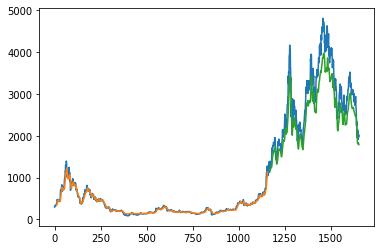

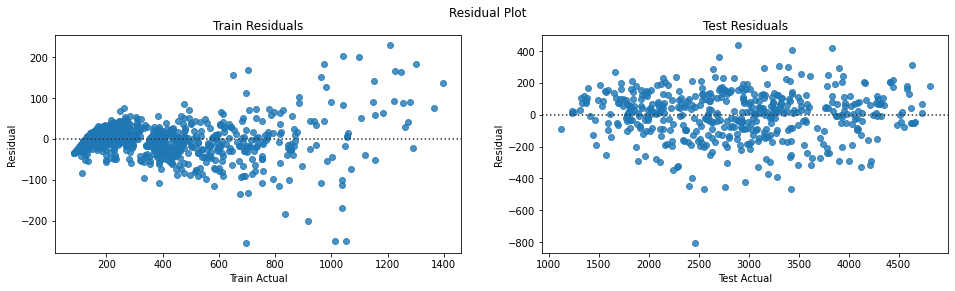

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025      15.547439
1  0.128224       -6.329010      15.716734
2  0.146512       20.251007      15.619471
3  0.152885       29.513977      15.744477
4  0.177126       64.745026      15.966660
5  0.126637       -8.635010      16.504002
6  0.136056        5.053986      16.637390
7  0.138788        9.025024      16.614325
8  0.127450       -7.453003      16.543352
9  0.101356      -45.378998      16.287233

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     17.515812
1  0.211663     114.941284     16.467031
2  0.128779      -5.521606     16.608000
3  0.243091     160.618774     16.172232
4  0.086346     -67.194580     17.105383
5  0.155038      32.643310     17.169056
6  0.061111    -103.870971     17.012884
7  0.187144      79.305054     16.095198
8  0.167002      50.030639     16.121965
9  0.128170      -6.407348     16.157852

RMSE Train = 29.073287353337122
RMSE Test = 143.37176802070869
MAPE Train = 20.207030836286368
MAPE Test = 1.2445558983952911
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


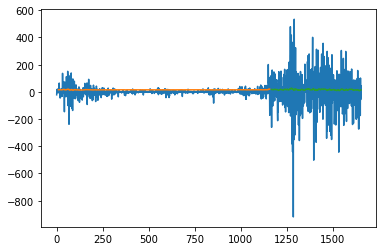

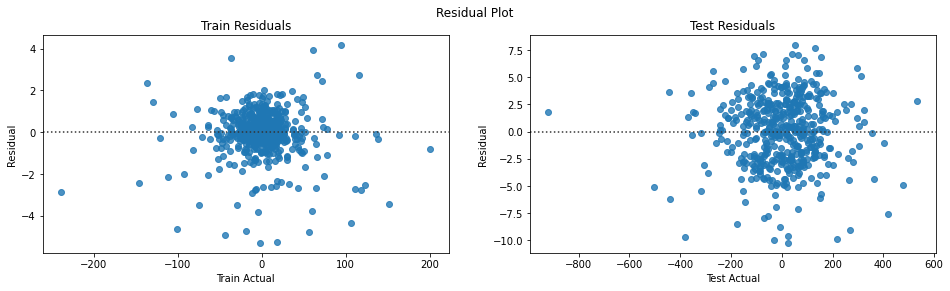

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832            0.0
1 -0.017258       -0.017258            0.0
2  0.056190        0.056190            0.0
3  0.077535        0.077535            0.0
4  0.157851        0.157851            0.0
5 -0.018182       -0.018182            0.0
6  0.010839        0.010839            0.0
7  0.019148        0.019148            0.0
8 -0.015516       -0.015516            0.0
9 -0.095959       -0.095959            0.0

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605           0.0
1  0.102482       0.102482           0.0
2 -0.004465      -0.004465           0.0
3  0.130479       0.130479           0.0
4 -0.048286      -0.048286           0.0
5  0.024647       0.024647           0.0
6 -0.076541      -0.076541           0.0
7  0.063283       0.063283           0.0
8  0.037547       0.037547           0.0
9 -0.004635      -0.004635           0.0

RMSE Train = 0.05107586243829624
RMSE Test = 0.050789093609195264
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


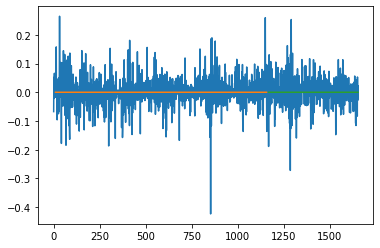

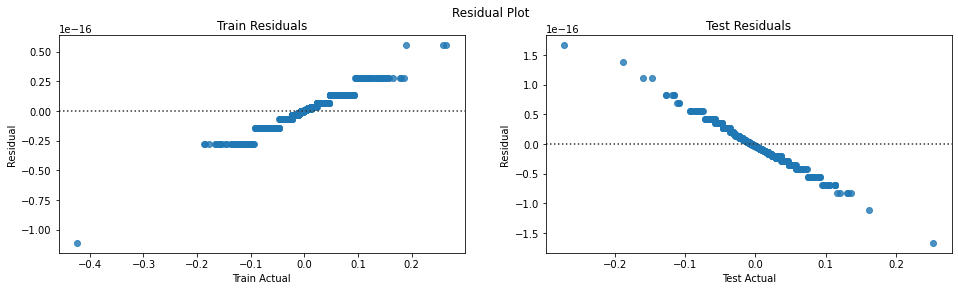

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     322.774109
1  0.058398      360.401001     330.271057
2  0.062681      380.652008     336.498230
3  0.068924      410.165985     346.170380
4  0.082619      474.911011     355.346344
5  0.080792      466.276001     374.773499
6  0.081861      471.329987     394.749603
7  0.083770      480.355011     422.521851
8  0.082194      472.902008     440.731232
9  0.072595      427.523010     451.773773

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1161.500000
1  0.243709    1236.512207   1160.178223
2  0.242541    1230.990601   1182.408447
3  0.276515    1391.609375   1136.312744
4  0.262302    1324.414795   1150.938232
5  0.269207    1357.058105   1151.947998
6  0.247236    1253.187134   1195.909424
7  0.264011    1332.492188   1189.612305
8  0.274593    1382.522827   1204.641602
9  0.273238    1376.115479   1199.698364

RMSE Train = 50.286776052545015
RMSE Test = 418.6931865648597
MAPE Train = 0.08731323411683825
MAPE Test = 0.12571283234615557
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


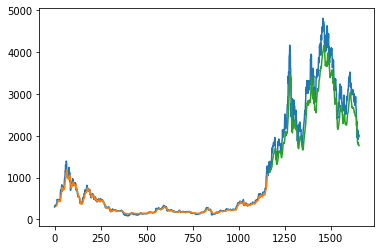

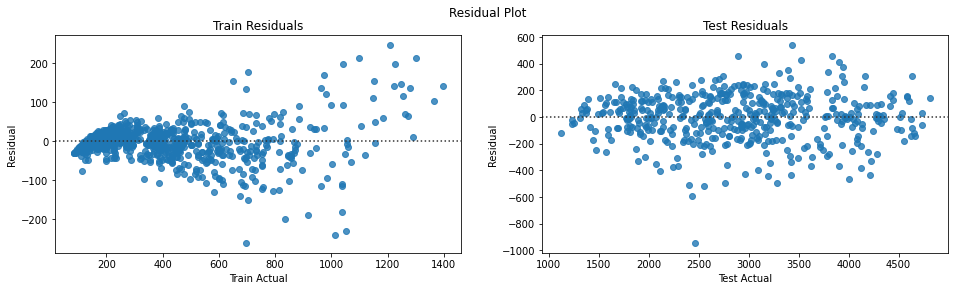

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025       1.105432
1  0.128224       -6.329010       1.301691
2  0.146512       20.251007       1.160290
3  0.152885       29.513977       1.187730
4  0.177126       64.745026       1.802453
5  0.126637       -8.635010       3.223610
6  0.136056        5.053986       3.610281
7  0.138788        9.025024       2.902691
8  0.127450       -7.453003       2.351901
9  0.101356      -45.378998       1.795068

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125      5.411352
1  0.211663     114.941284     -1.280930
2  0.128779      -5.521606     -2.058386
3  0.243091     160.618774     -2.524497
4  0.086346     -67.194580      1.807261
5  0.155038      32.643310      0.798807
6  0.061111    -103.870971      0.823778
7  0.187144      79.305054     -2.140489
8  0.167002      50.030639     -1.678906
9  0.128170      -6.407348      1.177291

RMSE Train = 25.191087670039167
RMSE Test = 142.72325831711947
MAPE Train = 1.4341717873723343
MAPE Test = 1.063051436458883
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


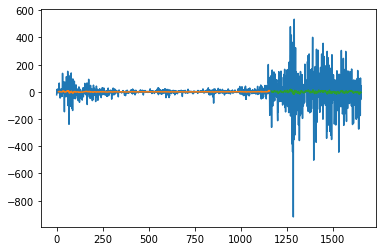

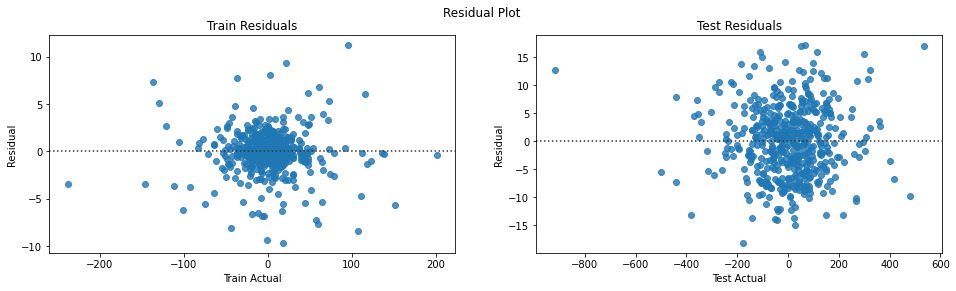

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832            0.0
1 -0.017258       -0.017258            0.0
2  0.056190        0.056190            0.0
3  0.077535        0.077535            0.0
4  0.157851        0.157851            0.0
5 -0.018182       -0.018182            0.0
6  0.010839        0.010839            0.0
7  0.019148        0.019148            0.0
8 -0.015516       -0.015516            0.0
9 -0.095959       -0.095959            0.0

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605           0.0
1  0.102482       0.102482           0.0
2 -0.004465      -0.004465           0.0
3  0.130479       0.130479           0.0
4 -0.048286      -0.048286           0.0
5  0.024647       0.024647           0.0
6 -0.076541      -0.076541           0.0
7  0.063283       0.063283           0.0
8  0.037547       0.037547           0.0
9 -0.004635      -0.004635           0.0

RMSE Train = 0.05107586243829624
RMSE Test = 0.050789093609195264
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


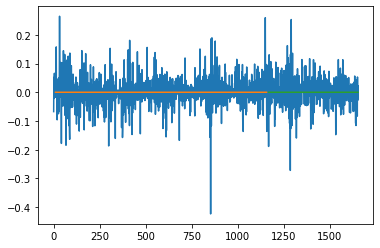

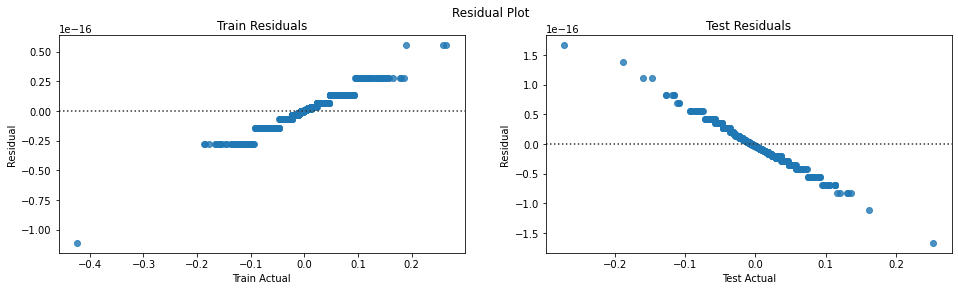

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   38.784398   
1           LSTM       3.0             Change in Close Price   25.111292   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
3   Stacked LSTM       3.0                             Close   38.091974   
4   Stacked LSTM       3.0             Change in Close Price   25.153857   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
6       CNN-LSTM       3.0                             Close   37.509168   
7       CNN-LSTM       3.0             Change in Close Price   25.159269   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050813   
9           LSTM       5.0                             Close   48.403469   
10          LSTM       5.0             Change in Close Price   25.598985   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
12  Stacked LSTM       5.0                             Close   44.790687   
13  Stacked LSTM       5.0             Change in Close Price   25.905455   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
15      CNN-LSTM       5.0                             Close   44.298334   
16      CNN-LSTM       5.0             Change in Close Price   26.865322   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
18          LSTM      10.0                             Close   45.529595   
19          LSTM      10.0             Change in Close Price   25.180045   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
21  Stacked LSTM      10.0                             Close   45.506111   
22  Stacked LSTM      10.0             Change in Close Price   29.073287   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
24      CNN-LSTM      10.0                             Close   50.286776   
25      CNN-LSTM      10.0             Change in Close Price   25.191088   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   

     rmse_test  mape_train  mape_test  
0   281.394145    0.076739   0.068808  
1   142.399189    1.426564   1.085074  
2     0.050825    1.000000   1.000000  
3   240.728393    0.070885   0.068848  
4   141.831471    1.722570   1.033962  
5     0.050825    1.000000   1.000000  
6   302.622062    0.083115   0.070726  
7   142.708645    2.710212   1.102486  
8     0.050897    1.208411   1.093914  
9   233.148763    0.115091   0.068210  
10  142.772939    6.029380   1.087274  
11    0.050779    1.000000   1.000000  
12  253.850325    0.095543   0.071766  
13  142.171286    7.337565   1.032450  
14    0.050779    1.000000   1.000000  
15  270.212452    0.069147   0.080319  
16  143.216947   12.306716   1.069858  
17    0.050779    1.000000   1.000000  
18  197.245100    0.102374   0.055872  
19  143.140410    1.317409   1.094116  
20    0.050789    1.000000   1.000000  
21  430.703855    0.080869   0.123501  
22  143.371768   20.207031   1.244556  
23    0.050789    1.000000   1.000000  
24  418.693187    0.087313   0.125713  
25  142.723258    1.434172   1.063051  
26    0.050789    1.000000   1.000000

################################################################
################## Executing for interval  20  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Percentage Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) 

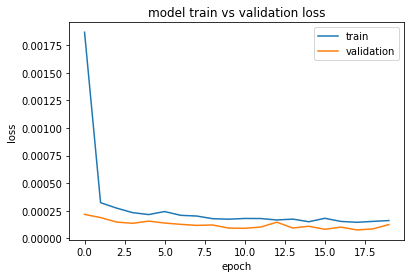

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_230 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_85 (Dropout)        (None, 100)               0         
                                                                 
 dense_244 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


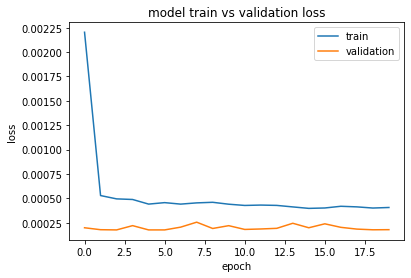

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_174"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_231 (LSTM)             (None, 100)               40800     
                                                                 
 dropout_86 (Dropout)        (None, 100)               0         
                                                                 
 dense_245 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


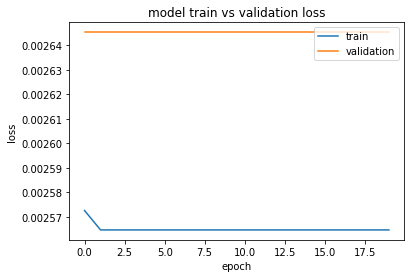

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_232 (LSTM)             (None, 20, 100)           40800     
                                                                 
 dropout_87 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_233 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_88 (Dropout)        (None, 100)               0         
                                                                 
 dense_246 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_______________________________________________________________

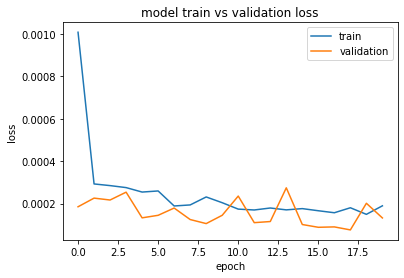

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_176"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_234 (LSTM)             (None, 20, 100)           40800     
                                                                 
 dropout_89 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_235 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_90 (Dropout)        (None, 100)               0         
                                                                 
 dense_247 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________

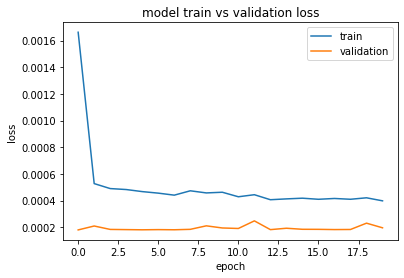

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_177"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_236 (LSTM)             (None, 20, 100)           40800     
                                                                 
 dropout_91 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_237 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_92 (Dropout)        (None, 100)               0         
                                                                 
 dense_248 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
______________________________________________

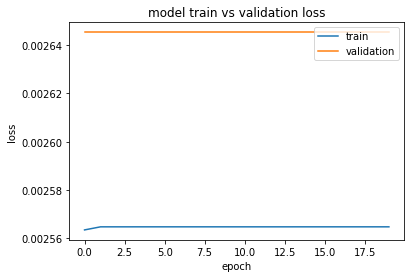

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_178"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_57 (Conv1D)          (None, 18, 8)             32        
                                                                 
 lstm_238 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_93 (Dropout)        (None, 100)               0         
                                                                 
 dense_249 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


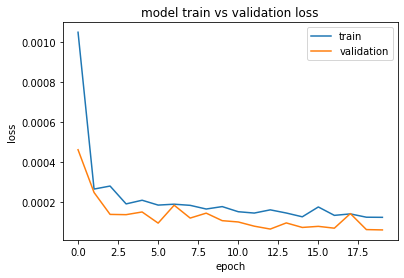

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_179"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_58 (Conv1D)          (None, 18, 8)             32        
                                                                 
 lstm_239 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_94 (Dropout)        (None, 100)               0         
                                                                 
 dense_250 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


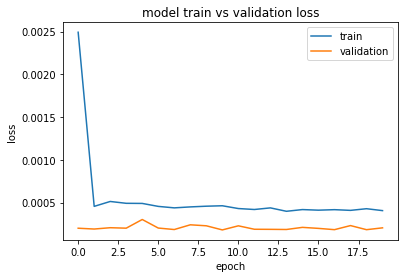

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_180"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_59 (Conv1D)          (None, 18, 8)             32        
                                                                 
 lstm_240 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_95 (Dropout)        (None, 100)               0         
                                                                 
 dense_251 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


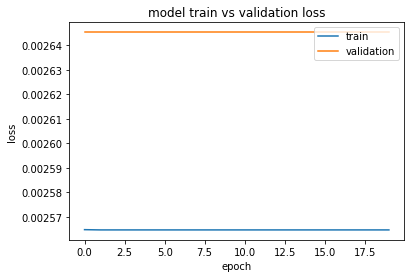

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     443.357544
1  0.080848      466.540009     443.534271
2  0.080194      463.449005     446.579010
3  0.080703      465.852997     447.579163
4  0.081623      470.204010     448.229248
5  0.080159      463.281006     449.253326
6  0.072821      428.588013     448.091980
7  0.074052      434.407990     438.727905
8  0.078625      456.031006     431.353058
9  0.082321      473.502014     429.769348

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1298.347168
1  0.271741    1369.040527   1295.462036
2  0.302655    1515.193726   1303.555054
3  0.333476    1660.909546   1340.985229
4  0.319485    1594.762695   1399.614502
5  0.345689    1718.650879   1437.721802
6  0.337059    1677.846802   1492.735718
7  0.323602    1614.227783   1531.086060
8  0.351605    1746.616821   1547.640747
9  0.356135    1768.035034   1586.445190

RMSE Train = 49.94707217817044
RMSE Test = 229.1507366036137
MAPE Train = 0.11047736555571591
MAPE Test = 0.06568797468712946
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


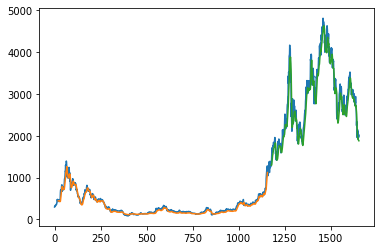

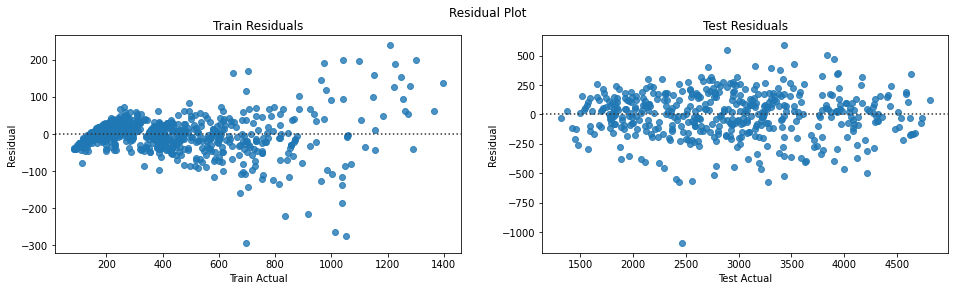

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004      -0.537887
1  0.145944       19.425995       0.962818
2  0.130452       -3.091004       2.082266
3  0.134233        2.403992       1.572950
4  0.135572        4.351013       1.522163
5  0.127815       -6.923004       1.599133
6  0.108708      -34.692993       0.981378
7  0.136583        5.819977      -1.161403
8  0.147456       21.623016      -0.319147
9  0.144599       17.471008       1.270808

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      4.178657
1  0.169770      54.054321     -0.298139
2  0.233138     146.153199      3.226447
3  0.232837     145.715820     11.251957
4  0.087067     -66.146851     17.317972
5  0.217819     123.888184      9.381734
6  0.104504     -40.804077     14.638132
7  0.088806     -63.619019      8.770650
8  0.223668     132.389038      2.978319
9  0.147315      21.418213     10.242680

RMSE Train = 25.144802955476656
RMSE Test = 143.86361699843073
MAPE Train = 1.984368923015157
MAPE Test = 1.1314065005321983
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


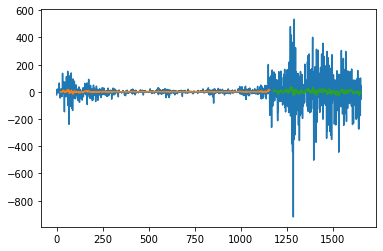

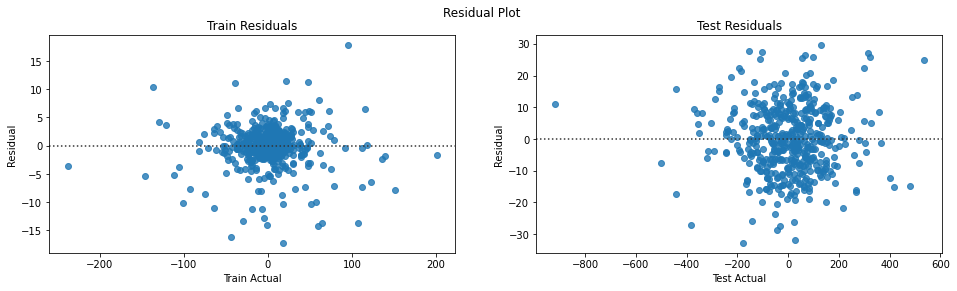

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824            0.0
1  0.043448        0.043448            0.0
2 -0.006625       -0.006625            0.0
3  0.005187        0.005187            0.0
4  0.009340        0.009340            0.0
5 -0.014723       -0.014723            0.0
6 -0.074885       -0.074885            0.0
7  0.013579        0.013579            0.0
8  0.049776        0.049776            0.0
9  0.038311        0.038311            0.0

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422           0.0
1  0.041106       0.041106           0.0
2  0.106756       0.106756           0.0
3  0.096170       0.096170           0.0
4 -0.039826      -0.039826           0.0
5  0.077684       0.077684           0.0
6 -0.023742      -0.023742           0.0
7 -0.037917      -0.037917           0.0
8  0.082014       0.082014           0.0
9  0.012263       0.012263           0.0

RMSE Train = 0.05090548489743309
RMSE Test = 0.0497136354488888
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


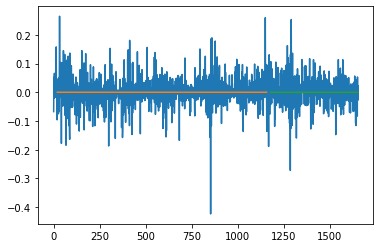

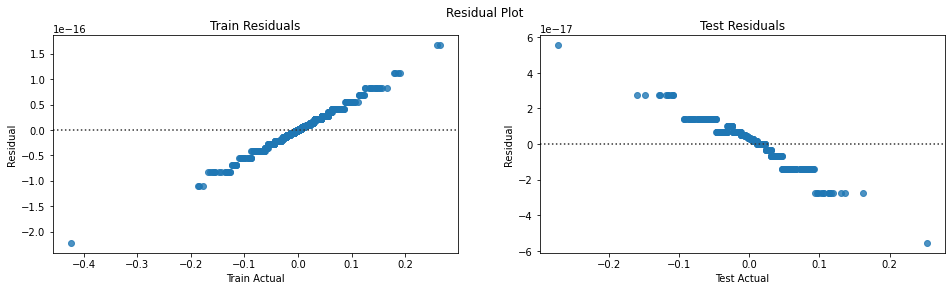

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     447.483093
1  0.080848      466.540009     445.212830
2  0.080194      463.449005     444.411041
3  0.080703      465.852997     443.815369
4  0.081623      470.204010     443.680786
5  0.080159      463.281006     444.376801
6  0.072821      428.588013     444.267120
7  0.074052      434.407990     438.318970
8  0.078625      456.031006     431.108093
9  0.082321      473.502014     427.695435

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1194.627930
1  0.271741    1369.040527   1196.458252
2  0.302655    1515.193726   1201.131714
3  0.333476    1660.909546   1228.062134
4  0.319485    1594.762695   1282.790039
5  0.345689    1718.650879   1332.278198
6  0.337059    1677.846802   1389.913330
7  0.323602    1614.227783   1434.979004
8  0.351605    1746.616821   1456.113647
9  0.356135    1768.035034   1482.658447

RMSE Train = 54.51512648601012
RMSE Test = 601.8022828440177
MAPE Train = 0.10623063509203728
MAPE Test = 0.17730015451251
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


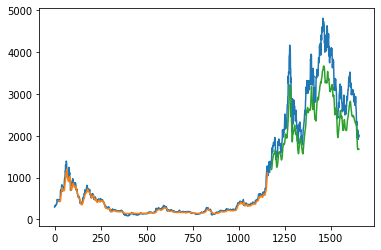

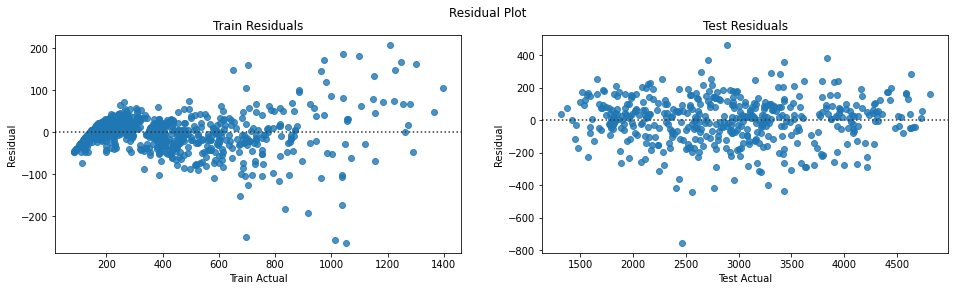

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004      -1.897754
1  0.145944       19.425995      -2.057303
2  0.130452       -3.091004      -2.021850
3  0.134233        2.403992      -2.056372
4  0.135572        4.351013      -2.090872
5  0.127815       -6.923004      -2.106509
6  0.108708      -34.692993      -2.189175
7  0.136583        5.819977      -2.510527
8  0.147456       21.623016      -2.620764
9  0.144599       17.471008      -2.493418

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273     -1.096582
1  0.169770      54.054321     -1.630198
2  0.233138     146.153199     -1.581599
3  0.232837     145.715820     -0.596145
4  0.087067     -66.146851      0.788671
5  0.217819     123.888184      0.760646
6  0.104504     -40.804077      1.329239
7  0.088806     -63.619019      1.011915
8  0.223668     132.389038      0.086625
9  0.147315      21.418213      0.334602

RMSE Train = 25.392467620974134
RMSE Test = 143.1247836225999
MAPE Train = 3.7669976755169414
MAPE Test = 1.016947935711091
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


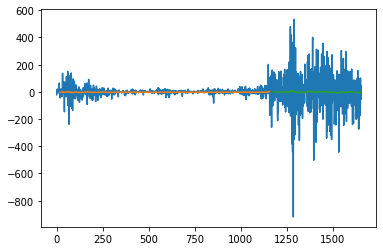

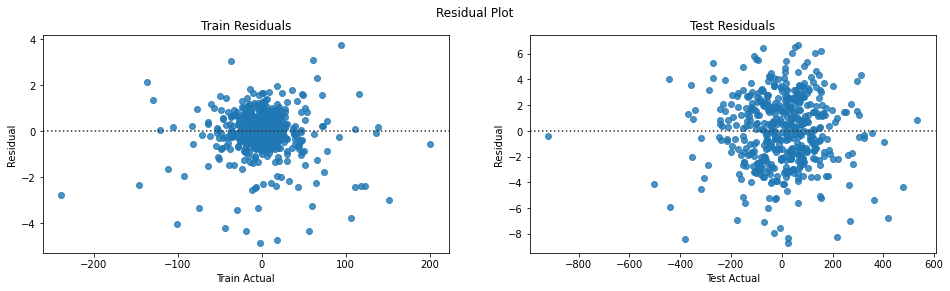

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824            0.0
1  0.043448        0.043448            0.0
2 -0.006625       -0.006625            0.0
3  0.005187        0.005187            0.0
4  0.009340        0.009340            0.0
5 -0.014723       -0.014723            0.0
6 -0.074885       -0.074885            0.0
7  0.013579        0.013579            0.0
8  0.049776        0.049776            0.0
9  0.038311        0.038311            0.0

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422           0.0
1  0.041106       0.041106           0.0
2  0.106756       0.106756           0.0
3  0.096170       0.096170           0.0
4 -0.039826      -0.039826           0.0
5  0.077684       0.077684           0.0
6 -0.023742      -0.023742           0.0
7 -0.037917      -0.037917           0.0
8  0.082014       0.082014           0.0
9  0.012263       0.012263           0.0

RMSE Train = 0.05090548489743309
RMSE Test = 0.0497136354488888
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


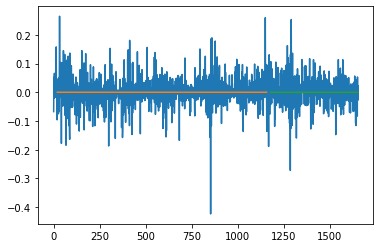

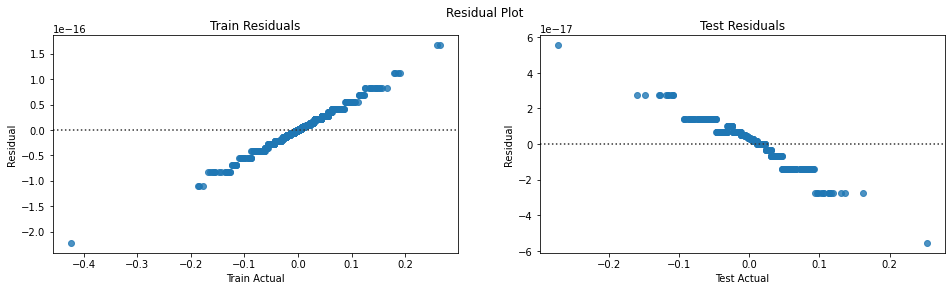

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     501.733917
1  0.080848      466.540009     496.222076
2  0.080194      463.449005     495.173279
3  0.080703      465.852997     496.028320
4  0.081623      470.204010     497.397369
5  0.080159      463.281006     499.200958
6  0.072821      428.588013     499.401031
7  0.074052      434.407990     490.961060
8  0.078625      456.031006     481.719086
9  0.082321      473.502014     478.826080

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1354.685913
1  0.271741    1369.040527   1353.967285
2  0.302655    1515.193726   1358.470581
3  0.333476    1660.909546   1394.407959
4  0.319485    1594.762695   1462.885620
5  0.345689    1718.650879   1516.038818
6  0.337059    1677.846802   1577.001465
7  0.323602    1614.227783   1618.793701
8  0.351605    1746.616821   1633.800049
9  0.356135    1768.035034   1662.739502

RMSE Train = 42.81743598836205
RMSE Test = 200.54712068519424
MAPE Train = 0.08987690300690168
MAPE Test = 0.05579985635582727
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


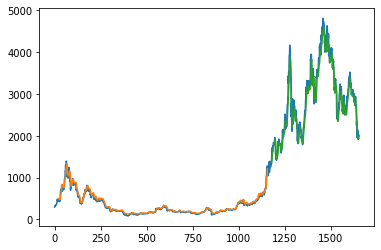

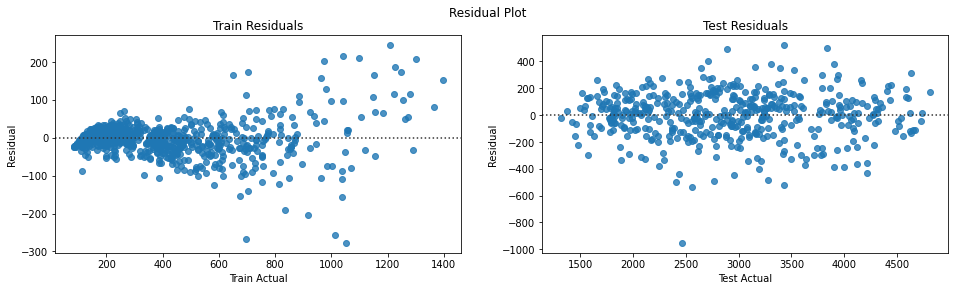

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004      -4.736690
1  0.145944       19.425995      -4.204265
2  0.130452       -3.091004      -3.596905
3  0.134233        2.403992      -3.983186
4  0.135572        4.351013      -3.925707
5  0.127815       -6.923004      -3.797127
6  0.108708      -34.692993      -4.096237
7  0.136583        5.819977      -5.142007
8  0.147456       21.623016      -4.624288
9  0.144599       17.471008      -3.969975

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273     -3.770315
1  0.169770      54.054321     -5.549101
2  0.233138     146.153199     -4.386793
3  0.232837     145.715820     -2.053037
4  0.087067     -66.146851      1.149483
5  0.217819     123.888184     -2.547128
6  0.104504     -40.804077      0.209661
7  0.088806     -63.619019     -2.020010
8  0.223668     132.389038     -4.037589
9  0.147315      21.418213     -2.400724

RMSE Train = 25.64008961771069
RMSE Test = 143.4054764094254
MAPE Train = 5.97929610993302
MAPE Test = 1.0500599289745551
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


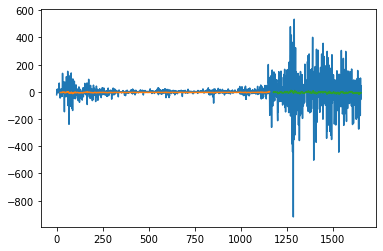

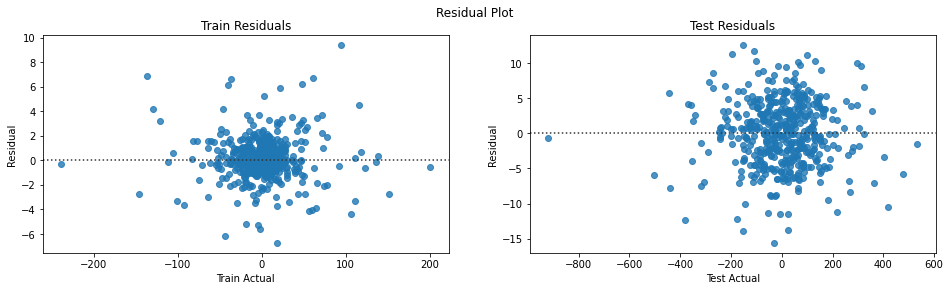

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824            0.0
1  0.043448        0.043448            0.0
2 -0.006625       -0.006625            0.0
3  0.005187        0.005187            0.0
4  0.009340        0.009340            0.0
5 -0.014723       -0.014723            0.0
6 -0.074885       -0.074885            0.0
7  0.013579        0.013579            0.0
8  0.049776        0.049776            0.0
9  0.038311        0.038311            0.0

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422           0.0
1  0.041106       0.041106           0.0
2  0.106756       0.106756           0.0
3  0.096170       0.096170           0.0
4 -0.039826      -0.039826           0.0
5  0.077684       0.077684           0.0
6 -0.023742      -0.023742           0.0
7 -0.037917      -0.037917           0.0
8  0.082014       0.082014           0.0
9  0.012263       0.012263           0.0

RMSE Train = 0.05090548489743309
RMSE Test = 0.0497136354488888
MAPE Train = 1.0
MAPE Test = 1.0
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


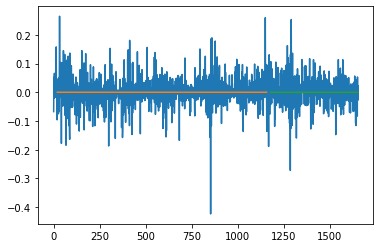

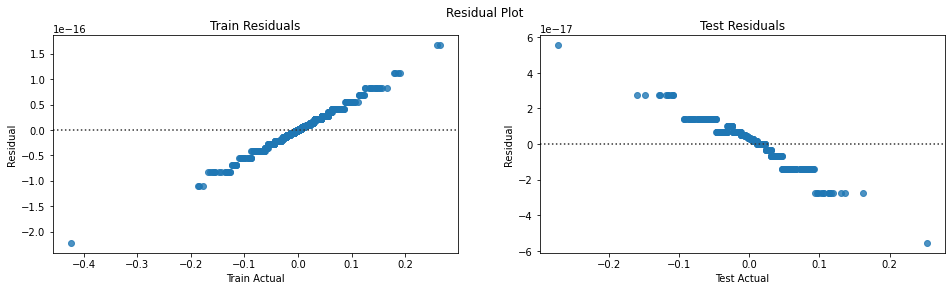

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   38.784398   
1           LSTM       3.0             Change in Close Price   25.111292   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
3   Stacked LSTM       3.0                             Close   38.091974   
4   Stacked LSTM       3.0             Change in Close Price   25.153857   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
6       CNN-LSTM       3.0                             Close   37.509168   
7       CNN-LSTM       3.0             Change in Close Price   25.159269   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050813   
9           LSTM       5.0                             Close   48.403469   
10          LSTM       5.0             Change in Close Price   25.598985   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
12  Stacked LSTM       5.0                             Close   44.790687   
13  Stacked LSTM       5.0             Change in Close Price   25.905455   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
15      CNN-LSTM       5.0                             Close   44.298334   
16      CNN-LSTM       5.0             Change in Close Price   26.865322   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
18          LSTM      10.0                             Close   45.529595   
19          LSTM      10.0             Change in Close Price   25.180045   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
21  Stacked LSTM      10.0                             Close   45.506111   
22  Stacked LSTM      10.0             Change in Close Price   29.073287   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
24      CNN-LSTM      10.0                             Close   50.286776   
25      CNN-LSTM      10.0             Change in Close Price   25.191088   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
27          LSTM      20.0                             Close   49.947072   
28          LSTM      20.0             Change in Close Price   25.144803   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
30  Stacked LSTM      20.0                             Close   54.515126   
31  Stacked LSTM      20.0             Change in Close Price   25.392468   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
33      CNN-LSTM      20.0                             Close   42.817436   
34      CNN-LSTM      20.0             Change in Close Price   25.640090   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   

     rmse_test  mape_train  mape_test  
0   281.394145    0.076739   0.068808  
1   142.399189    1.426564   1.085074  
2     0.050825    1.000000   1.000000  
3   240.728393    0.070885   0.068848  
4   141.831471    1.722570   1.033962  
5     0.050825    1.000000   1.000000  
6   302.622062    0.083115   0.070726  
7   142.708645    2.710212   1.102486  
8     0.050897    1.208411   1.093914  
9   233.148763    0.115091   0.068210  
10  142.772939    6.029380   1.087274  
11    0.050779    1.000000   1.000000  
12  253.850325    0.095543   0.071766  
13  142.171286    7.337565   1.032450  
14    0.050779    1.000000   1.000000  
15  270.212452    0.069147   0.080319  
16  143.216947   12.306716   1.069858  
17    0.050779    1.000000   1.000000  
18  197.245100    0.102374   0.055872  
19  143.140410    1.317409   1.094116  
20    0.050789    1.000000   1.000000  
21  430.703855    0.080869   0.123501  
22  143.371768   20.207031   1.244556  
23    0.050789    1.000000   1.000000  
24  418.693187    0.087313   0.125713  
25  142.723258    1.434172   1.063051  
26    0.050789    1.000000   1.000000  
27  229.150737    0.110477   0.065688  
28  143.863617    1.984369   1.131407 

Total execution time (mins) =  10.697559384504954


model  interval                            target  rmse_train  \
33      CNN-LSTM      20.0                             Close   42.817436   
18          LSTM      10.0                             Close   45.529595   
27          LSTM      20.0                             Close   49.947072   
9           LSTM       5.0                             Close   48.403469   
0           LSTM       3.0                             Close   38.784398   
3   Stacked LSTM       3.0                             Close   38.091974   
6       CNN-LSTM       3.0                             Close   37.509168   
12  Stacked LSTM       5.0                             Close   44.790687   
15      CNN-LSTM       5.0                             Close   44.298334   
21  Stacked LSTM      10.0                             Close   45.506111   
24      CNN-LSTM      10.0                             Close   50.286776   
30  Stacked LSTM      20.0                             Close   54.515126   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
31  Stacked LSTM      20.0             Change in Close Price   25.392468   
13  Stacked LSTM       5.0             Change in Close Price   25.905455   
4   Stacked LSTM       3.0             Change in Close Price   25.153857   
34      CNN-LSTM      20.0             Change in Close Price   25.640090   
25      CNN-LSTM      10.0             Change in Close Price   25.191088   
16      CNN-LSTM       5.0             Change in Close Price   26.865322   
1           LSTM       3.0             Change in Close Price   25.111292   
10          LSTM       5.0             Change in Close Price   25.598985   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050813   
19          LSTM      10.0             Change in Close Price   25.180045   
7       CNN-LSTM       3.0             Change in Close Price   25.159269   
28          LSTM      20.0             Change in Close Price   25.144803   
22  Stacked LSTM      10.0             Change in Close Price   29.073287   

     rmse_test  mape_train  mape_test  
33  200.547121    0.089877   0.055800  
18  197.245100    0.102374   0.055872  
27  229.150737    0.110477   0.065688  
9   233.148763    0.115091   0.068210  
0   281.394145    0.076739   0.068808  
3   240.728393    0.070885   0.068848  
6   302.622062    0.083115   0.070726  
12  253.850325    0.095543   0.071766  
15  270.212452    0.069147   0.080319  
21  430.703855    0.080869   0.123501  
24  418.693187    0.087313   0.125713  
30  601.802283    0.106231   0.177300  
29    0.049714    1.000000   1.000000  
32    0.049714    1.000000   1.000000  
23    0.050789    1.000000   1.000000  
20    0.050789    1.000000   1.000000  
26    0.050789    1.000000   1.000000  
17    0.050779    1.000000   1.000000  
35    0.049714    1.000000   1.000000  
2     0.050825    1.000000   1.000000  
14    0.050779    1.000000   1.000000  
11    0.050779    1.000000   1.000000  
5     0.050825    1.000000   1.000000  
31  143.124784    3.766998   1.016948  
13  142.171286    7.337565   1.032450  
4   141.831471    1.722570   1.033962  
34  143.405476    5.979296   1.050060  
25  142.723258    1.434172   1.063051  
16  143.216947   12.306716   1.069858 

In [391]:
import time

start=time.time()

ibm = IntervalBasedModel(df_close, df_deltaClose, df_deltaPctClose)
ibm.execute_all_intervals()

end=time.time()
total_execution_time = end-start
print("Total execution time (mins) = ", total_execution_time/60)

metrics_df = ibm.get_metrics_df()

metrics_df.sort_values(by=['mape_test'], ascending=True)

## Evaluate Models

In [392]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
33      CNN-LSTM      20.0                             Close   42.817436   
18          LSTM      10.0                             Close   45.529595   
27          LSTM      20.0                             Close   49.947072   
9           LSTM       5.0                             Close   48.403469   
0           LSTM       3.0                             Close   38.784398   
3   Stacked LSTM       3.0                             Close   38.091974   
6       CNN-LSTM       3.0                             Close   37.509168   
12  Stacked LSTM       5.0                             Close   44.790687   
15      CNN-LSTM       5.0                             Close   44.298334   
21  Stacked LSTM      10.0                             Close   45.506111   
24      CNN-LSTM      10.0                             Close   50.286776   
30  Stacked LSTM      20.0                             Close   54.515126   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
31  Stacked LSTM      20.0             Change in Close Price   25.392468   
13  Stacked LSTM       5.0             Change in Close Price   25.905455   
4   Stacked LSTM       3.0             Change in Close Price   25.153857   
34      CNN-LSTM      20.0             Change in Close Price   25.640090   
25      CNN-LSTM      10.0             Change in Close Price   25.191088   
16      CNN-LSTM       5.0             Change in Close Price   26.865322   
1           LSTM       3.0             Change in Close Price   25.111292   
10          LSTM       5.0             Change in Close Price   25.598985   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050813   
19          LSTM      10.0             Change in Close Price   25.180045   
7       CNN-LSTM       3.0             Change in Close Price   25.159269   
28          LSTM      20.0             Change in Close Price   25.144803   
22  Stacked LSTM      10.0             Change in Close Price   29.073287   

     rmse_test  mape_train  mape_test  
33  200.547121    0.089877   0.055800  
18  197.245100    0.102374   0.055872  
27  229.150737    0.110477   0.065688  
9   233.148763    0.115091   0.068210  
0   281.394145    0.076739   0.068808  
3   240.728393    0.070885   0.068848  
6   302.622062    0.083115   0.070726  
12  253.850325    0.095543   0.071766  
15  270.212452    0.069147   0.080319  
21  430.703855    0.080869   0.123501  
24  418.693187    0.087313   0.125713  
30  601.802283    0.106231   0.177300  
29    0.049714    1.000000   1.000000  
32    0.049714    1.000000   1.000000  
23    0.050789    1.000000   1.000000  
20    0.050789    1.000000   1.000000  
26    0.050789    1.000000   1.000000  
17    0.050779    1.000000   1.000000  
35    0.049714    1.000000   1.000000  
2     0.050825    1.000000   1.000000  
14    0.050779    1.000000   1.000000  
11    0.050779    1.000000   1.000000  
5     0.050825    1.000000   1.000000  
31  143.124784    3.766998   1.016948  
13  142.171286    7.337565   1.032450  
4   141.831471    1.722570   1.033962  
34  143.405476    5.979296   1.050060  
25  142.723258    1.434172   1.063051  
16  143.216947   12.306716   1.069858 

### Evaluate By MAPE and RMSE

In [393]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
33      CNN-LSTM      20.0                             Close   42.817436   
18          LSTM      10.0                             Close   45.529595   
27          LSTM      20.0                             Close   49.947072   
9           LSTM       5.0                             Close   48.403469   
0           LSTM       3.0                             Close   38.784398   
3   Stacked LSTM       3.0                             Close   38.091974   
6       CNN-LSTM       3.0                             Close   37.509168   
12  Stacked LSTM       5.0                             Close   44.790687   
15      CNN-LSTM       5.0                             Close   44.298334   
21  Stacked LSTM      10.0                             Close   45.506111   
24      CNN-LSTM      10.0                             Close   50.286776   
30  Stacked LSTM      20.0                             Close   54.515126   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
2           LSTM       3.0  Percentage Change in Close Price    0.050988   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
31  Stacked LSTM      20.0             Change in Close Price   25.392468   
13  Stacked LSTM       5.0             Change in Close Price   25.905455   
4   Stacked LSTM       3.0             Change in Close Price   25.153857   
34      CNN-LSTM      20.0             Change in Close Price   25.640090   
25      CNN-LSTM      10.0             Change in Close Price   25.191088   
16      CNN-LSTM       5.0             Change in Close Price   26.865322   
1           LSTM       3.0             Change in Close Price   25.111292   
10          LSTM       5.0             Change in Close Price   25.598985   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050813   
19          LSTM      10.0             Change in Close Price   25.180045   
7       CNN-LSTM       3.0             Change in Close Price   25.159269   
28          LSTM      20.0             Change in Close Price   25.144803   
22  Stacked LSTM      10.0             Change in Close Price   29.073287   

     rmse_test  mape_train  mape_test  
33  200.547121    0.089877   0.055800  
18  197.245100    0.102374   0.055872  
27  229.150737    0.110477   0.065688  
9   233.148763    0.115091   0.068210  
0   281.394145    0.076739   0.068808  
3   240.728393    0.070885   0.068848  
6   302.622062    0.083115   0.070726  
12  253.850325    0.095543   0.071766  
15  270.212452    0.069147   0.080319  
21  430.703855    0.080869   0.123501  
24  418.693187    0.087313   0.125713  
30  601.802283    0.106231   0.177300  
29    0.049714    1.000000   1.000000  
32    0.049714    1.000000   1.000000  
23    0.050789    1.000000   1.000000  
20    0.050789    1.000000   1.000000  
26    0.050789    1.000000   1.000000  
17    0.050779    1.000000   1.000000  
35    0.049714    1.000000   1.000000  
2     0.050825    1.000000   1.000000  
14    0.050779    1.000000   1.000000  
11    0.050779    1.000000   1.000000  
5     0.050825    1.000000   1.000000  
31  143.124784    3.766998   1.016948  
13  142.171286    7.337565   1.032450  
4   141.831471    1.722570   1.033962  
34  143.405476    5.979296   1.050060  
25  142.723258    1.434172   1.063051  
16  143.216947   12.306716   1.069858 

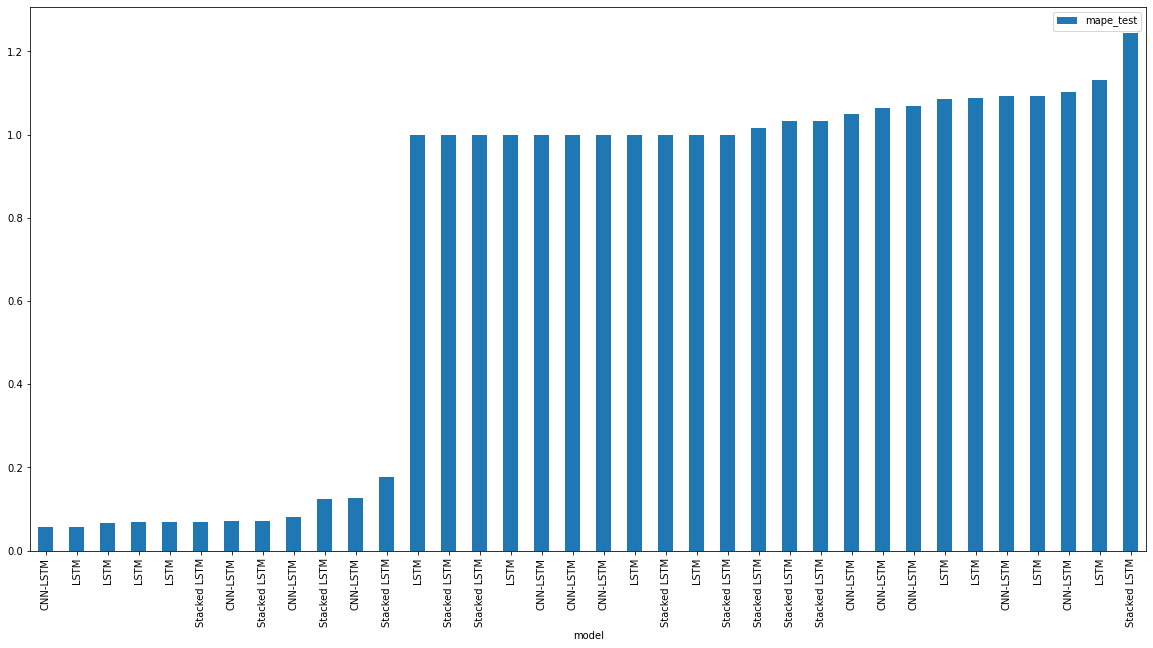

In [395]:
metrics_df.sort_values(by=['mape_test'], ascending=True).plot.bar(x='model', y='mape_test', figsize=(20,10))
plt.show()

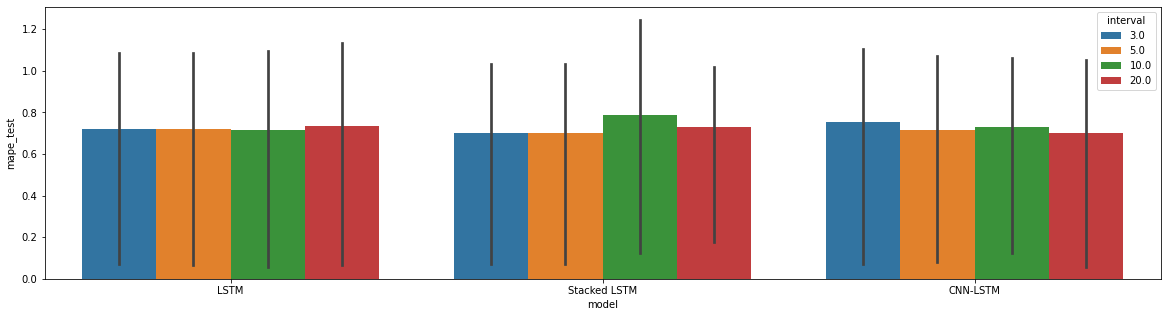

In [396]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="model", y="mape_test", hue="interval", data=metrics_df)
plt.show()

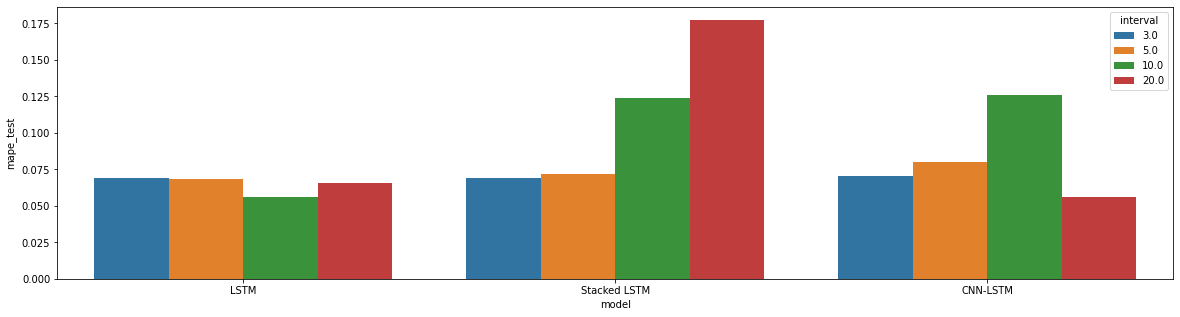

In [397]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="model", y="mape_test", hue="interval", data=metrics_df[metrics_df.target=="Close"])
plt.show()

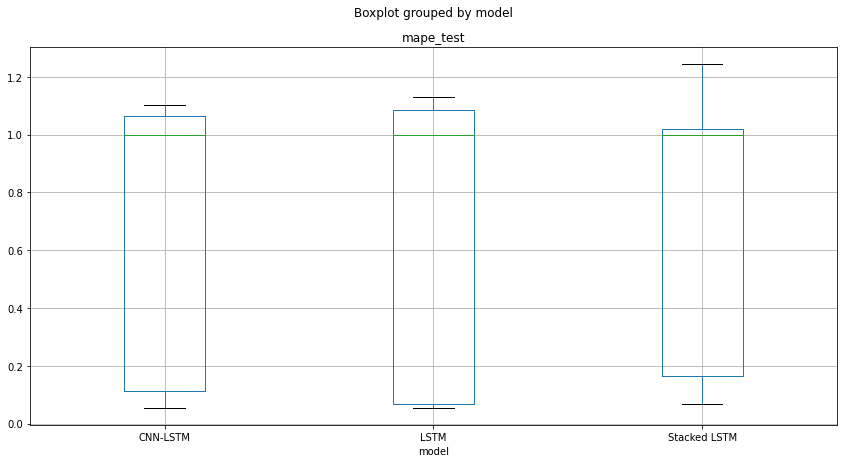

In [398]:
metrics_df.boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.show()

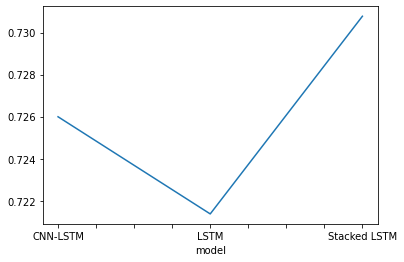

In [399]:
# metrics_df.groupby(by='model')
# metrics_df.groupby(by='model')['mape_test'].agg(['mean', 'min', 'max'])
metrics_df.groupby(by='model')['mape_test'].agg('mean').plot()

In [400]:
metrics_df.groupby(by='model')['mape_test'].agg('mean')

model
CNN-LSTM        0.725994
LSTM            0.721371
Stacked LSTM    0.730778
Name: mape_test, dtype: float64

In [401]:
for model in ['LSTM', 'Stacked LSTM', 'CNN-LSTM']:
  print(f"Best Performing {model} model")
  df = metrics_df[metrics_df.model == model].sort_values(by=['mape_test'], ascending=True)
  display(df)

Best Performing LSTM model


model  interval                            target  rmse_train   rmse_test  \
18  LSTM      10.0                             Close   45.529595  197.245100   
27  LSTM      20.0                             Close   49.947072  229.150737   
9   LSTM       5.0                             Close   48.403469  233.148763   
0   LSTM       3.0                             Close   38.784398  281.394145   
2   LSTM       3.0  Percentage Change in Close Price    0.050988    0.050825   
11  LSTM       5.0  Percentage Change in Close Price    0.050988    0.050779   
20  LSTM      10.0  Percentage Change in Close Price    0.051076    0.050789   
29  LSTM      20.0  Percentage Change in Close Price    0.050905    0.049714   
1   LSTM       3.0             Change in Close Price   25.111292  142.399189   
10  LSTM       5.0             Change in Close Price   25.598985  142.772939   
19  LSTM      10.0             Change in Close Price   25.180045  143.140410   
28  LSTM      20.0             Change in Close Price   25.144803  143.863617   

    mape_train  mape_test  
18    0.102374   0.055872  
27    0.110477   0.065688  
9     0.115091   0.068210  
0     0.076739   0.068808  
2     1.000000   1.000000  
11    1.000000   1.000000  
20    1.000000   1.000000  
29    1.000000   1.000000  
1     1.426564   1.085074  
10    6.029380   1.087274  
19    1.317409   1.094116  
28    1.984369   1.131407

Best Performing Stacked LSTM model


model  interval                            target  rmse_train  \
3   Stacked LSTM       3.0                             Close   38.091974   
12  Stacked LSTM       5.0                             Close   44.790687   
21  Stacked LSTM      10.0                             Close   45.506111   
30  Stacked LSTM      20.0                             Close   54.515126   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
31  Stacked LSTM      20.0             Change in Close Price   25.392468   
13  Stacked LSTM       5.0             Change in Close Price   25.905455   
4   Stacked LSTM       3.0             Change in Close Price   25.153857   
22  Stacked LSTM      10.0             Change in Close Price   29.073287   

     rmse_test  mape_train  mape_test  
3   240.728393    0.070885   0.068848  
12  253.850325    0.095543   0.071766  
21  430.703855    0.080869   0.123501  
30  601.802283    0.106231   0.177300  
5     0.050825    1.000000   1.000000  
14    0.050779    1.000000   1.000000  
23    0.050789    1.000000   1.000000  
32    0.049714    1.000000   1.000000  
31  143.124784    3.766998   1.016948  
13  142.171286    7.337565   1.032450  
4   141.831471    1.722570   1.033962  
22  143.371768   20.207031   1.244556

Best Performing CNN-LSTM model


model  interval                            target  rmse_train  \
33  CNN-LSTM      20.0                             Close   42.817436   
6   CNN-LSTM       3.0                             Close   37.509168   
15  CNN-LSTM       5.0                             Close   44.298334   
24  CNN-LSTM      10.0                             Close   50.286776   
17  CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
26  CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
35  CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
34  CNN-LSTM      20.0             Change in Close Price   25.640090   
25  CNN-LSTM      10.0             Change in Close Price   25.191088   
16  CNN-LSTM       5.0             Change in Close Price   26.865322   
8   CNN-LSTM       3.0  Percentage Change in Close Price    0.050813   
7   CNN-LSTM       3.0             Change in Close Price   25.159269   

     rmse_test  mape_train  mape_test  
33  200.547121    0.089877   0.055800  
6   302.622062    0.083115   0.070726  
15  270.212452    0.069147   0.080319  
24  418.693187    0.087313   0.125713  
17    0.050779    1.000000   1.000000  
26    0.050789    1.000000   1.000000  
35    0.049714    1.000000   1.000000  
34  143.405476    5.979296   1.050060  
25  142.723258    1.434172   1.063051  
16  143.216947   12.306716   1.069858  
8     0.050897    1.208411   1.093914  
7   142.708645    2.710212   1.102486

[]

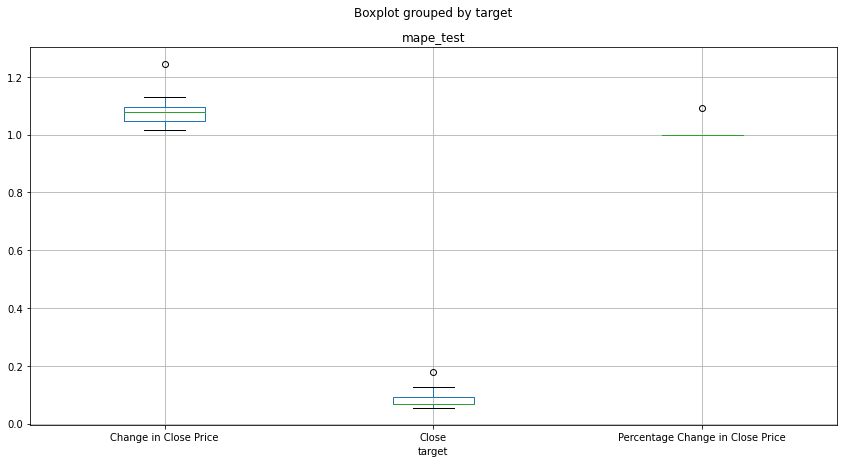

In [402]:
metrics_df.boxplot(column=['mape_test'], by='target', figsize=(14, 7))
plt.plot()

[]

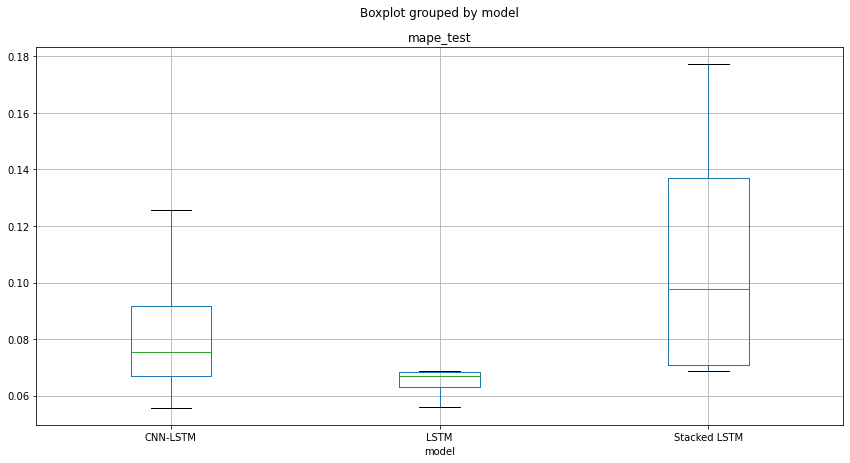

In [403]:
metrics_df[metrics_df.target == 'Close'].boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.plot()

In [404]:
# Display best performing model on Close price
metrics_df[metrics_df.target == 'Close'].sort_values(by=['mape_test'], ascending=True)

model  interval target  rmse_train   rmse_test  mape_train  \
33      CNN-LSTM      20.0  Close   42.817436  200.547121    0.089877   
18          LSTM      10.0  Close   45.529595  197.245100    0.102374   
27          LSTM      20.0  Close   49.947072  229.150737    0.110477   
9           LSTM       5.0  Close   48.403469  233.148763    0.115091   
0           LSTM       3.0  Close   38.784398  281.394145    0.076739   
3   Stacked LSTM       3.0  Close   38.091974  240.728393    0.070885   
6       CNN-LSTM       3.0  Close   37.509168  302.622062    0.083115   
12  Stacked LSTM       5.0  Close   44.790687  253.850325    0.095543   
15      CNN-LSTM       5.0  Close   44.298334  270.212452    0.069147   
21  Stacked LSTM      10.0  Close   45.506111  430.703855    0.080869   
24      CNN-LSTM      10.0  Close   50.286776  418.693187    0.087313   
30  Stacked LSTM      20.0  Close   54.515126  601.802283    0.106231   

    mape_test  
33   0.055800  
18   0.055872  
27   0.065688  
9    0.068210  
0    0.068808  
3    0.068848  
6    0.070726  
12   0.071766  
15   0.080319  
21   0.123501  
24   0.125713  
30   0.177300

### Evaluate By Window Size

[]

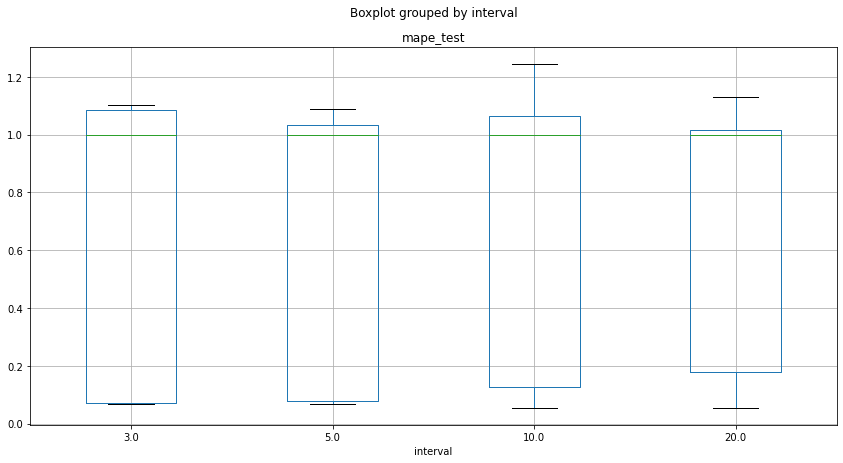

In [405]:
metrics_df.boxplot(column=['mape_test'], by='interval', figsize=(14, 7))
plt.plot()

[]

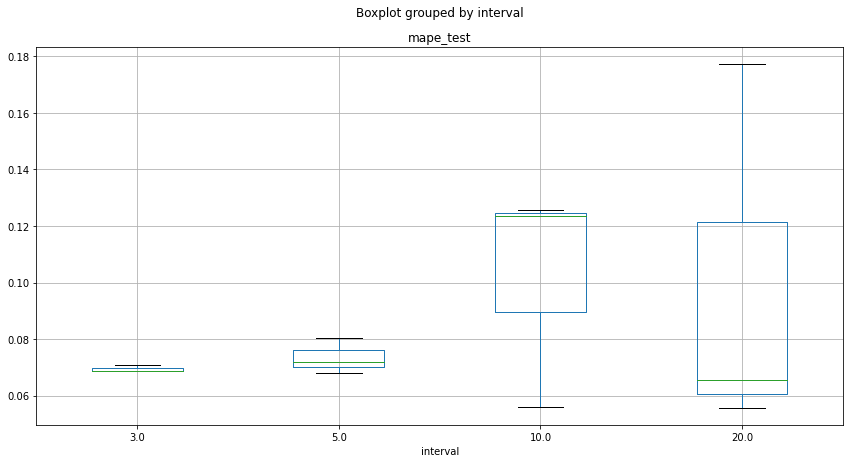

In [406]:
metrics_df[metrics_df.target=="Close"].boxplot(column=['mape_test'], by='interval', figsize=(14, 7))
plt.plot()

In [407]:
# metrics_df[metrics_df.target=="Close"]
metrics_df[metrics_df.interval=="Close"]

Empty DataFrame
Columns: [model, interval, target, rmse_train, rmse_test, mape_train, mape_test]
Index: []

In [408]:
# Display best performing model on Close price
for i in [3,5,10,20]:
  display(metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True))

model  interval                            target  rmse_train  \
0          LSTM       3.0                             Close   38.784398   
3  Stacked LSTM       3.0                             Close   38.091974   
6      CNN-LSTM       3.0                             Close   37.509168   
2          LSTM       3.0  Percentage Change in Close Price    0.050988   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.050988   
4  Stacked LSTM       3.0             Change in Close Price   25.153857   
1          LSTM       3.0             Change in Close Price   25.111292   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.050813   
7      CNN-LSTM       3.0             Change in Close Price   25.159269   

    rmse_test  mape_train  mape_test  
0  281.394145    0.076739   0.068808  
3  240.728393    0.070885   0.068848  
6  302.622062    0.083115   0.070726  
2    0.050825    1.000000   1.000000  
5    0.050825    1.000000   1.000000  
4  141.831471    1.722570   1.033962  
1  142.399189    1.426564   1.085074  
8    0.050897    1.208411   1.093914  
7  142.708645    2.710212   1.102486

model  interval                            target  rmse_train  \
9           LSTM       5.0                             Close   48.403469   
12  Stacked LSTM       5.0                             Close   44.790687   
15      CNN-LSTM       5.0                             Close   44.298334   
11          LSTM       5.0  Percentage Change in Close Price    0.050988   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050988   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050988   
13  Stacked LSTM       5.0             Change in Close Price   25.905455   
16      CNN-LSTM       5.0             Change in Close Price   26.865322   
10          LSTM       5.0             Change in Close Price   25.598985   

     rmse_test  mape_train  mape_test  
9   233.148763    0.115091   0.068210  
12  253.850325    0.095543   0.071766  
15  270.212452    0.069147   0.080319  
11    0.050779    1.000000   1.000000  
14    0.050779    1.000000   1.000000  
17    0.050779    1.000000   1.000000  
13  142.171286    7.337565   1.032450  
16  143.216947   12.306716   1.069858  
10  142.772939    6.029380   1.087274

model  interval                            target  rmse_train  \
18          LSTM      10.0                             Close   45.529595   
21  Stacked LSTM      10.0                             Close   45.506111   
24      CNN-LSTM      10.0                             Close   50.286776   
20          LSTM      10.0  Percentage Change in Close Price    0.051076   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.051076   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051076   
25      CNN-LSTM      10.0             Change in Close Price   25.191088   
19          LSTM      10.0             Change in Close Price   25.180045   
22  Stacked LSTM      10.0             Change in Close Price   29.073287   

     rmse_test  mape_train  mape_test  
18  197.245100    0.102374   0.055872  
21  430.703855    0.080869   0.123501  
24  418.693187    0.087313   0.125713  
20    0.050789    1.000000   1.000000  
23    0.050789    1.000000   1.000000  
26    0.050789    1.000000   1.000000  
25  142.723258    1.434172   1.063051  
19  143.140410    1.317409   1.094116  
22  143.371768   20.207031   1.244556

model  interval                            target  rmse_train  \
33      CNN-LSTM      20.0                             Close   42.817436   
27          LSTM      20.0                             Close   49.947072   
30  Stacked LSTM      20.0                             Close   54.515126   
29          LSTM      20.0  Percentage Change in Close Price    0.050905   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050905   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050905   
31  Stacked LSTM      20.0             Change in Close Price   25.392468   
34      CNN-LSTM      20.0             Change in Close Price   25.640090   
28          LSTM      20.0             Change in Close Price   25.144803   

     rmse_test  mape_train  mape_test  
33  200.547121    0.089877   0.055800  
27  229.150737    0.110477   0.065688  
30  601.802283    0.106231   0.177300  
29    0.049714    1.000000   1.000000  
32    0.049714    1.000000   1.000000  
35    0.049714    1.000000   1.000000  
31  143.124784    3.766998   1.016948  
34  143.405476    5.979296   1.050060  
28  143.863617    1.984369   1.131407

In [409]:
metrics_df['mape_test'].mean()

0.726047406050728

In [410]:
# metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True)
print("Interval mean MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].mean())
print("Interval min MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].min())
print("Interval max MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].max())

Interval mean MAPE
interval
3.0     0.724869
5.0     0.712209
10.0    0.745201
20.0    0.721911
Name: mape_test, dtype: float64
Interval min MAPE
interval
3.0     0.068808
5.0     0.068210
10.0    0.055872
20.0    0.055800
Name: mape_test, dtype: float64
Interval max MAPE
interval
3.0     1.102486
5.0     1.087274
10.0    1.244556
20.0    1.131407
Name: mape_test, dtype: float64


In [411]:
interval_group_df = metrics_df.groupby(by='interval')['mape_test'].agg(['mean', 'min', 'max'])

In [412]:
display(interval_group_df.sort_values(by='mean', ascending=True))
display(interval_group_df.sort_values(by='min', ascending=True))
display(interval_group_df.sort_values(by='max', ascending=False))

mean       min       max
interval                              
5.0       0.712209  0.068210  1.087274
20.0      0.721911  0.055800  1.131407
3.0       0.724869  0.068808  1.102486
10.0      0.745201  0.055872  1.244556

mean       min       max
interval                              
20.0      0.721911  0.055800  1.131407
10.0      0.745201  0.055872  1.244556
5.0       0.712209  0.068210  1.087274
3.0       0.724869  0.068808  1.102486

mean       min       max
interval                              
10.0      0.745201  0.055872  1.244556
20.0      0.721911  0.055800  1.131407
3.0       0.724869  0.068808  1.102486
5.0       0.712209  0.068210  1.087274

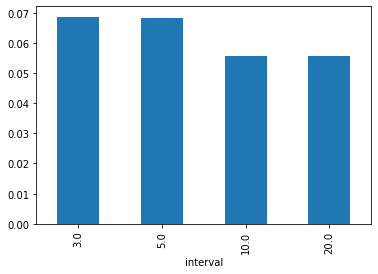

In [413]:
interval_group_df['min'].plot.bar()

mape_test    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

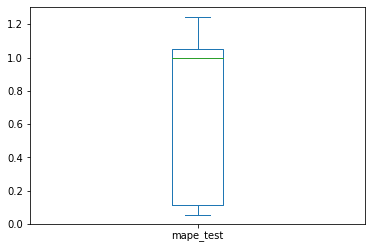

In [414]:
# metrics_df.groupby(by=['model','interval'])['mape_test'].plot.box(subplots=True)
metrics_df['mape_test'].plot.box(subplots=True)

## End